# Prerequisites

Before anything we install and import libraries needed in this assignment.

In [1]:
!pip install numpy==1.22.4

In [2]:
!pip install scikit-optimize

LAMDA-SSL is a comprehensive and easy-to-use toolkit for SSL in python.

In [3]:
!pip install LAMDA-SSL

In [4]:
!pip install scikit_posthocs

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# model selection
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# SL model construction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# SSL model construction
from sklearn.semi_supervised import SelfTrainingClassifier
from LAMDA_SSL.Algorithm.Classification.Co_Training import Co_Training
from LAMDA_SSL.Algorithm.Classification.SemiBoost import SemiBoost
from sklearn.semi_supervised import LabelPropagation as sklearn_LabelPropagation
from LAMDA_SSL.Algorithm.Classification.LabelPropagation import LabelPropagation
from LAMDA_SSL.Algorithm.Classification.LabelSpreading import LabelSpreading

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_curve

# sampling
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.over_sampling import ADASYN

# performance comparison
import time
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

In [6]:
!pip install ucimlrepo

# Data Set

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [8]:
X, y = pd.DataFrame(bank_marketing.data.features), pd.DataFrame(bank_marketing.data.targets)

In [9]:
X.head(16)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


In [10]:
y.head(16)

,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


# Data Preprocessing and Feature Engineering

In [11]:
bank_marketing_df = pd.concat([X, y], axis=1)
bank_marketing_df.head(16)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [12]:
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
bank_marketing_df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [14]:
bank_marketing_df.isna().sum() / len(bank_marketing_df) * 100

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64

In [15]:
bank_marketing_df.duplicated().sum()

0

In [16]:
class Preprocessor:
    def __init__(self, train_data,pool_data, test_data, pool_flag = True):
        self.pool_flag = pool_flag
        self.train_data = train_data.copy()
        if self.pool_flag:
            self.pool_data = pool_data.copy()
        else:
            self.pool_data = None
        self.test_data = test_data.copy()
        self.label_encoders = {}
        self.target_col = 'y'


    def handle_missing_values(self):
      drop_cols = ["poutcome"]
      self.train_data = self.train_data.drop(columns = drop_cols, axis = 1)
      self.test_data = self.test_data.drop(columns = drop_cols, axis = 1)
      if self.pool_flag:
          self.pool_data = self.pool_data.drop(columns = drop_cols, axis = 1)


      categorical_cols =  self.train_data.select_dtypes(include=['object']).columns.tolist()
      for col in categorical_cols:
          fill_value = self.train_data[col].mode()[0]
          self.train_data[col].fillna(fill_value, inplace=True)
          self.test_data[col].fillna(fill_value, inplace=True)
          if self.pool_flag:
            self.pool_data[col].fillna(fill_value, inplace=True)


      numerical_cols = [col for col in self.train_data.columns if col not in categorical_cols and col != self.target_col]
      for col in numerical_cols:
          fill_value = self.train_data[col].mean()
          self.train_data[col].fillna(fill_value, inplace=True)
          self.test_data[col].fillna(fill_value, inplace=True)
          if self.pool_flag:
            self.pool_data[col].fillna(fill_value, inplace=True)


    def normalize_data(self):

        cols = self.train_data.columns.to_list()
        if self.target_col in cols:
            cols.remove(self.target_col)

        self.scaler = StandardScaler()

        self.train_data[cols] = self.scaler.fit_transform(self.train_data[cols])

        self.test_data[cols] = self.scaler.transform(self.test_data[cols])
        if self.pool_flag:
            self.pool_data[cols] = self.scaler.transform(self.pool_data[cols])



    def hash_encode_categorical_columns(self):
            self.categorical_cols = self.train_data.select_dtypes(include=['object']).columns.tolist()

            for col in self.categorical_cols:

                hash_function = lambda x: hash(x) % 10

                self.train_data[col] = self.train_data[col].apply(hash_function)

                self.test_data[col] = self.test_data[col].apply(hash_function)
                if self.pool_flag:
                  self.pool_data[col] = self.pool_data[col].apply(hash_function)

    def handle_label(self):
      mapping = {'yes': 1, 'no': 0}
      self.train_data[self.target_col] = self.train_data[self.target_col].map(mapping)
      self.test_data[self.target_col] = self.test_data[self.target_col].map(mapping)
      if self.pool_flag:
          self.pool_data[self.target_col] = self.pool_data[self.target_col].map(mapping)

    def feature_selection(self):
      y = self.train_data[self.target_col]
      X = self.train_data.drop(self.target_col, axis=1)
      model = XGBClassifier()

      model.fit(X, y)

      importance = model.feature_importances_

      for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

      column_names = X.columns

      feature_importance_df = pd.DataFrame({
          'Feature': column_names,
          'Importance': importance
      })

      feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
      drop_cols = feature_importance_df[feature_importance_df["Importance"] == 0]["Feature"].to_list()

      self.train_data = self.train_data.drop(columns = drop_cols, axis = 1)
      self.test_data = self.test_data.drop(columns = drop_cols, axis = 1)
      if self.pool_flag:
          self.pool_data = self.pool_data.drop(columns = drop_cols, axis = 1)

    def preprocess(self):
        self.handle_missing_values()
        self.handle_label()
        self.hash_encode_categorical_columns()
        self.normalize_data()
        print(self.train_data[self.target_col])
        self.feature_selection()
        return self.train_data,self.pool_data, self.test_data

In [17]:
# data = bank_marketing_df.copy().sample(frac = 0.5) 0.5 0.25 0.2 0.12.5
data = bank_marketing_df.copy().sample(frac=0.15)
target_col = 'y'
labels = data[target_col]
data = data.drop(target_col, axis=1)

In [18]:
test_size = 0.25

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=test_size, random_state=42)

target_col = 'y'
data_train[target_col] = label_train
data_test[target_col] = label_test
data_pool = False

preprocessor = Preprocessor(data_train, data_pool,data_test,pool_flag = False)
train_processed, pool_processed, test_processed = preprocessor.preprocess()

print(train_processed.info())
print(test_processed.info())

23177    0
7882     0
7335     0
18712    0
4365     0
        ..
2168     0
21887    0
23642    0
21818    0
19043    0
Name: y, Length: 5086, dtype: int64
Feature: 0, Score: 0.05777
Feature: 1, Score: 0.04989
Feature: 2, Score: 0.05219
Feature: 3, Score: 0.04702
Feature: 4, Score: 0.01647
Feature: 5, Score: 0.04465
Feature: 6, Score: 0.17072
Feature: 7, Score: 0.10034
Feature: 8, Score: 0.03414
Feature: 9, Score: 0.04844
Feature: 10, Score: 0.06447
Feature: 11, Score: 0.13062
Feature: 12, Score: 0.05021
Feature: 13, Score: 0.08662
Feature: 14, Score: 0.04646
<class 'pandas.core.frame.DataFrame'>
Index: 5086 entries, 23177 to 19043
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          5086 non-null   float64
 1   job          5086 non-null   float64
 2   marital      5086 non-null   float64
 3   education    5086 non-null   float64
 4   default      5086 non-null   float64
 5   balance      5086 non-null 

In [19]:
SL_X_train = train_processed
SL_y_train = SL_X_train[target_col]
SL_X_train = SL_X_train.drop(target_col, axis=1)

SL_X_test = test_processed
SL_y_test = SL_X_test[target_col]
SL_X_test = SL_X_test.drop(target_col, axis=1)

print(SL_y_train.value_counts())
print(SL_y_test.value_counts())


print(SL_X_train.shape)
print(SL_y_test.shape)


y
0    4526
1     560
Name: count, dtype: int64
y
0    1481
1     215
Name: count, dtype: int64
(5086, 15)
(1696,)


In [20]:
test_size = 0.25
train_size = 0.1

data_remaining, data_test, label_remaining, label_test = train_test_split(data, labels, test_size=test_size, random_state=42)
data_pool, data_train, label_pool, label_train = train_test_split(data_remaining, label_remaining, test_size=train_size, random_state=42)

data_train[target_col] = label_train
data_pool[target_col] = label_pool
data_test[target_col] = label_test

preprocessor = Preprocessor(data_train, data_pool,data_test, pool_flag = True)
train_processed, pool_processed, test_processed = preprocessor.preprocess()

print(train_processed.info())
print(pool_processed.info())
print(test_processed.info())

32696    0
42140    1
13491    0
5515     1
9371     0
        ..
5274     0
8840     0
28185    0
40869    1
19924    1
Name: y, Length: 509, dtype: int64
Feature: 0, Score: 0.09202
Feature: 1, Score: 0.05339
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.11896
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.08310
Feature: 6, Score: 0.10368
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06909
Feature: 10, Score: 0.06442
Feature: 11, Score: 0.15271
Feature: 12, Score: 0.07667
Feature: 13, Score: 0.09961
Feature: 14, Score: 0.08636
<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 32696 to 19924
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          509 non-null    float64
 1   job          509 non-null    float64
 2   education    509 non-null    float64
 3   balance      509 non-null    float64
 4   housing      509 non-null    float64
 5   day_of_week  509 non-null    

In [21]:
SSL_X_train = train_processed
SSL_y_train = SSL_X_train[target_col]
SSL_X_train = SSL_X_train.drop(target_col, axis=1)

SSL_X_pool = pool_processed
SSL_y_pool = SSL_X_pool[target_col]
SSL_X_pool = SSL_X_pool.drop(target_col, axis=1)

SSL_X_test = test_processed
SSL_y_test = SSL_X_test[target_col]
SSL_X_test = SSL_X_test.drop(target_col, axis=1)

print(SSL_y_train.value_counts())
print(SSL_y_test.value_counts())
print(SSL_y_pool.value_counts())

print(SSL_X_train.shape)
print(SSL_y_test.shape)
print(SSL_y_pool.shape)

y
0    468
1     41
Name: count, dtype: int64
y
0    1481
1     215
Name: count, dtype: int64
y
0    4058
1     519
Name: count, dtype: int64
(509, 11)
(1696,)
(4577,)


In [22]:
SL_X_train_over_sampled, SL_y_train_over_sampled = BorderlineSMOTE().fit_resample(SL_X_train, SL_y_train)
SL_y_train_over_sampled.value_counts()

y
0    4526
1    4526
Name: count, dtype: int64

In [23]:
SSL_X_train_over_sampled, SSL_y_train_over_sampled = BorderlineSMOTE().fit_resample(SSL_X_train, SSL_y_train)
SSL_y_train_over_sampled.value_counts()

y
0    468
1    468
Name: count, dtype: int64

# Supervised Learning

In [24]:
def constrcut_model(estimator, search_spaces, n_iter, scoring, cv, n_jobs, random_state):
  opt = BayesSearchCV(estimator, search_spaces, n_iter=n_iter, scoring=scoring, cv=cv, n_jobs=n_jobs, random_state=random_state)
  return opt

def get_best_model(model, X_train, y_train):
  model.fit(X_train, y_train)
  for mean_score, params in zip(model.cv_results_['mean_test_score'], model.cv_results_['params']):
    print(f"Score: {mean_score:.2f}, Params: {params}")
  best_estimator = model.best_estimator_
  print(f'\nBest hyperparameters: {model.best_params_}\n')
  return best_estimator

def plot_roc_curve(y_true, y_pred, label=None):
  fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
  plt.plot(fpr, tpr, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

def print_evaluation_report(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
  print(f'Confusion Matrix:\n{cm}\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print(f'\nClassification Report:\n{classification_report(y_true, y_pred)}\n')

  accuracy = accuracy_score(y_true, y_pred)
  micro_f1 = f1_score(y_true, y_pred, average="micro")
  macro_f1 = f1_score(y_true, y_pred, average="macro")
  print(f'Accuracy: {accuracy:.2f}\nMicro F1 score: {micro_f1:.2f}\nMacro F1 score: {macro_f1:.2f}\n')

  print('\nROC Curve:\n')
  plot_roc_curve(y_true, y_pred)

def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print_evaluation_report(y_test, y_pred)
  return y_pred

In [25]:
kf = StratifiedKFold(n_splits=5)

In [26]:
kf.get_n_splits(SL_X_train)

5


XGBoost Classifier (XGB)

Score: 0.94, Params: OrderedDict([('colsample_bytree', 0.705051979426657), ('gamma', 3.6386287158866253), ('learning_rate', 0.7340675018434776), ('max_depth', 7), ('min_child_weight', 7), ('reg_alpha', 4.141186324855385), ('reg_lambda', 3.5093133489914403), ('subsample', 0.8697521170952103)])
Score: 0.93, Params: OrderedDict([('colsample_bytree', 0.9186941777766422), ('gamma', 4.416576386904311), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('min_child_weight', 9), ('reg_alpha', 0.6231294084407147), ('reg_lambda', 1.3830853827857517), ('subsample', 0.676793698814209)])
Score: 0.92, Params: OrderedDict([('colsample_bytree', 0.7224162561505759), ('gamma', 4.593612608346885), ('learning_rate', 0.01620758534278905), ('max_depth', 9), ('min_child_weight', 3), ('reg_alpha', 4.53665343806299), ('reg_lambda', 1.5544805405054332), ('subsample', 0.8757762656702482)])
Score: 0.95, Params: OrderedDict([('colsample_bytree', 0.9061979941786817), ('gamma', 0.8

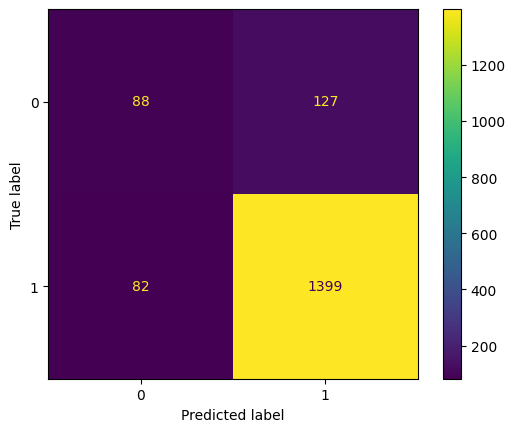


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1481
           1       0.52      0.41      0.46       215

    accuracy                           0.88      1696
   macro avg       0.72      0.68      0.69      1696
weighted avg       0.87      0.88      0.87      1696


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.69


ROC Curve:



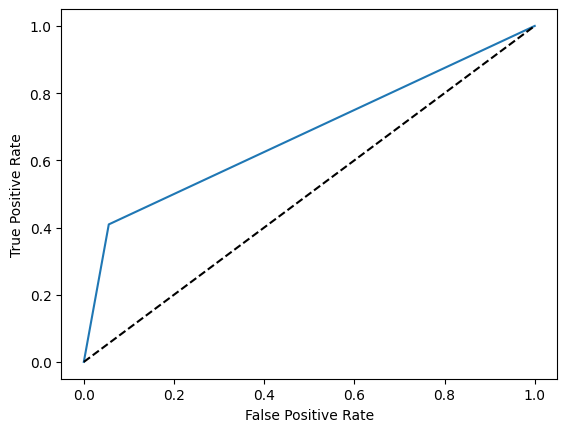

In [27]:
# XGBoost Classifier (XGB)
print('\nXGBoost Classifier (XGB)\n')

xgb_learning_rate = Real(0.01, 1.0, prior='log-uniform')
xgb_max_depth = Integer(1, 20)
xgb_min_child_weight = Integer(1, 10)
xgb_subsample = Real(0.5, 1.0, prior='uniform')
xgb_colsample_bytree = Real(0.5, 1.0, prior='uniform')
xgb_gamma = Real(0, 5.0, prior='uniform')
xgb_reg_alpha = Real(0, 10.0, prior='uniform')
xgb_reg_lambda = Real(0, 10.0, prior='uniform')

xgb_search_spaces = {
  'learning_rate': xgb_learning_rate,
  'max_depth': xgb_max_depth,
  'min_child_weight': xgb_min_child_weight,
  'subsample': xgb_subsample,
  'colsample_bytree': xgb_colsample_bytree,
  'gamma': xgb_gamma,
  'reg_alpha': xgb_reg_alpha,
  'reg_lambda': xgb_reg_lambda,
}

xgb_model = constrcut_model(XGBClassifier(), xgb_search_spaces, n_iter=30, scoring='f1_macro', cv=kf, n_jobs=-1, random_state=42,)
best_xgb_model = get_best_model(xgb_model, SSL_X_train_over_sampled, SSL_y_train_over_sampled)
evaluate_model(best_xgb_model, SSL_X_test, SSL_y_test)
best_xgb_hyperparams = best_xgb_model.get_params()


Support Vector Machine (SVM)

Score: 0.82, Params: OrderedDict([('C', 0.4369339947510315), ('degree', 3), ('kernel', 'sigmoid')])
Score: 0.95, Params: OrderedDict([('C', 22.364202820542708), ('degree', 4), ('kernel', 'poly')])
Score: 0.88, Params: OrderedDict([('C', 0.6016307829589929), ('degree', 4), ('kernel', 'poly')])
Score: 0.96, Params: OrderedDict([('C', 17.76576664980768), ('degree', 2), ('kernel', 'rbf')])
Score: 0.96, Params: OrderedDict([('C', 15.783879853890564), ('degree', 2), ('kernel', 'rbf')])
Score: 0.95, Params: OrderedDict([('C', 8.632012725909878), ('degree', 4), ('kernel', 'poly')])
Score: 0.95, Params: OrderedDict([('C', 2.9397976202716882), ('degree', 3), ('kernel', 'rbf')])
Score: 0.94, Params: OrderedDict([('C', 1.491462267977867), ('degree', 4), ('kernel', 'rbf')])
Score: 0.77, Params: OrderedDict([('C', 66.36085077612337), ('degree', 3), ('kernel', 'sigmoid')])
Score: 0.87, Params: OrderedDict([('C', 0.010340016434251914), ('degree', 3), ('kernel', 'sigmoid'

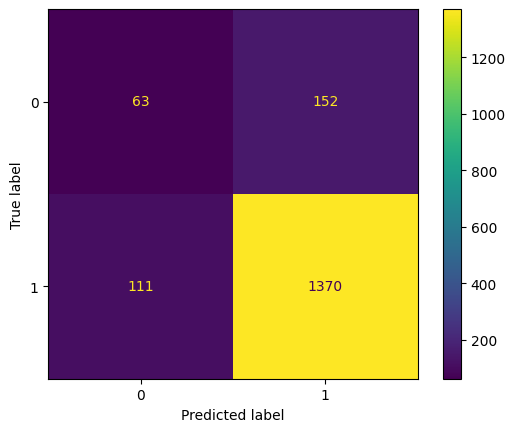


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1481
           1       0.36      0.29      0.32       215

    accuracy                           0.84      1696
   macro avg       0.63      0.61      0.62      1696
weighted avg       0.83      0.84      0.84      1696


Accuracy: 0.84
Micro F1 score: 0.84
Macro F1 score: 0.62


ROC Curve:



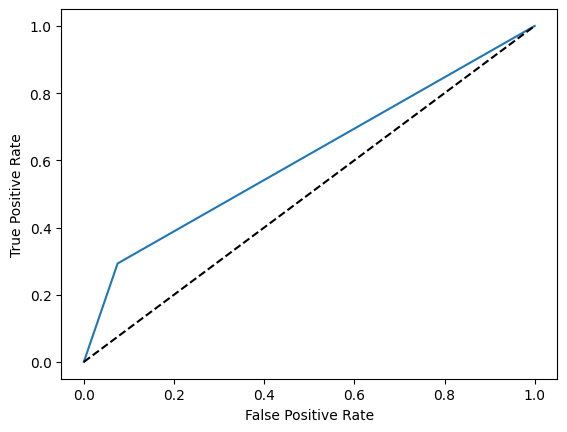

In [28]:
# Support Vector Machine (SVM)
print('\nSupport Vector Machine (SVM)\n')

svm_kernel = Categorical(['poly', 'rbf', 'sigmoid'])
svm_C = Real(1e-2, 1e+2, prior='log-uniform')
svm_degree = Integer(1, 4)

svm_search_spaces = {
    'C': svm_C,
    'kernel': svm_kernel,
    'degree': svm_degree,
}

svm_model = constrcut_model(SVC(probability=True), svm_search_spaces, n_iter=30, scoring='f1_macro', cv=kf, n_jobs=-1, random_state=42,)
best_svm_model = get_best_model(svm_model, SSL_X_train_over_sampled, SSL_y_train_over_sampled)
evaluate_model(best_svm_model, SSL_X_test, SSL_y_test)
best_svm_hyperparams = best_svm_model.get_params()

Training runtime: 1.00 seconds
Confusion Matrix:
[[  95  120]
 [  53 1428]]



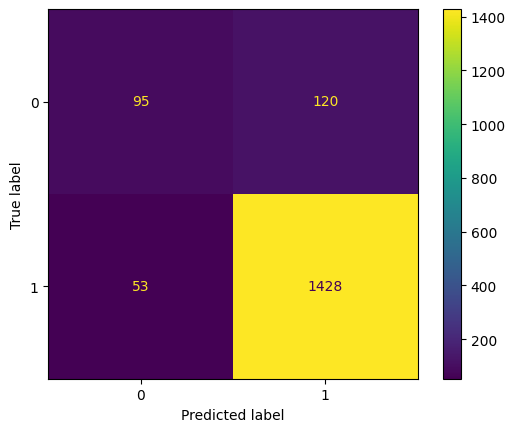


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1481
           1       0.64      0.44      0.52       215

    accuracy                           0.90      1696
   macro avg       0.78      0.70      0.73      1696
weighted avg       0.89      0.90      0.89      1696


Accuracy: 0.90
Micro F1 score: 0.90
Macro F1 score: 0.73


ROC Curve:



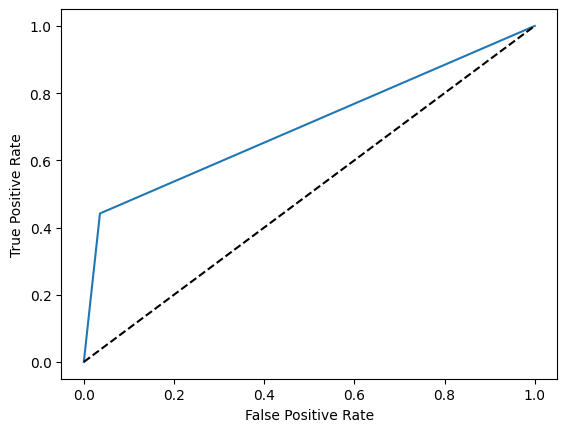

In [29]:
start_time = time.time()
xgb_model = XGBClassifier(**best_xgb_hyperparams).fit(SL_X_train_over_sampled, SL_y_train_over_sampled)
end_time = time.time()
print(f'Training runtime: {(end_time - start_time):.2f} seconds')
print_evaluation_report(SL_y_test, xgb_model.predict(SL_X_test))

Training runtime: 0.39 seconds
Confusion Matrix:
[[  56  159]
 [  28 1453]]



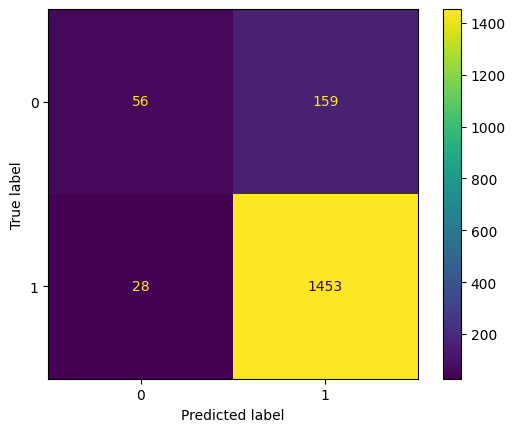


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1481
           1       0.67      0.26      0.37       215

    accuracy                           0.89      1696
   macro avg       0.78      0.62      0.66      1696
weighted avg       0.87      0.89      0.87      1696


Accuracy: 0.89
Micro F1 score: 0.89
Macro F1 score: 0.66


ROC Curve:



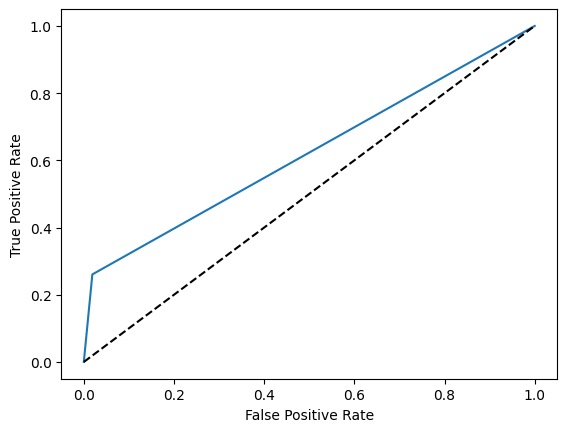

In [30]:
start_time = time.time()
xgb_model = XGBClassifier(**best_xgb_hyperparams).fit(SL_X_train, SL_y_train)
end_time = time.time()
print(f'Training runtime: {(end_time - start_time):.2f} seconds')
print_evaluation_report(SL_y_test, xgb_model.predict(SL_X_test))

Training runtime: 18.31 seconds
Confusion Matrix:
[[  85  130]
 [ 134 1347]]



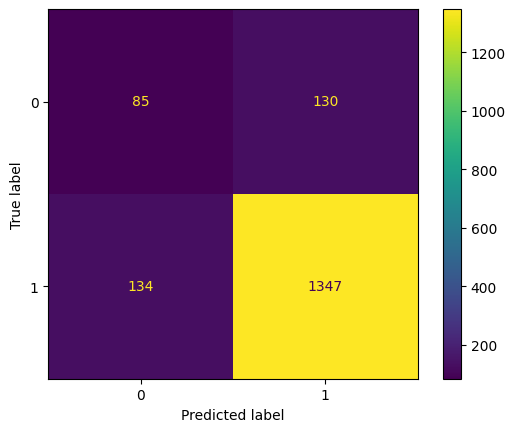


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1481
           1       0.39      0.40      0.39       215

    accuracy                           0.84      1696
   macro avg       0.65      0.65      0.65      1696
weighted avg       0.85      0.84      0.84      1696


Accuracy: 0.84
Micro F1 score: 0.84
Macro F1 score: 0.65


ROC Curve:



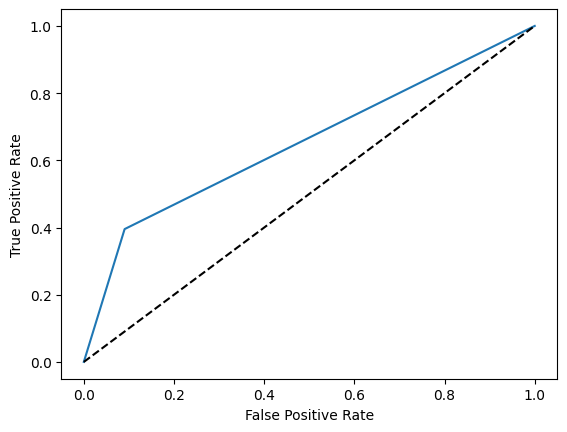

In [31]:
start_time = time.time()
svm_model = SVC(**best_svm_hyperparams).fit(SL_X_train_over_sampled, SL_y_train_over_sampled)
end_time = time.time()
print(f'Training runtime: {(end_time - start_time):.2f} seconds')
print_evaluation_report(SL_y_test, svm_model.predict(SL_X_test))

Training runtime: 6.06 seconds
Confusion Matrix:
[[  69  146]
 [  72 1409]]



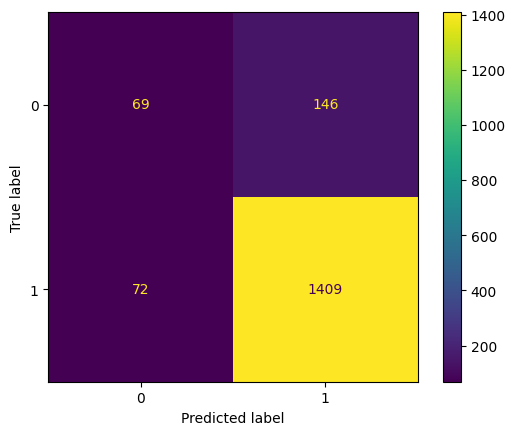


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1481
           1       0.49      0.32      0.39       215

    accuracy                           0.87      1696
   macro avg       0.70      0.64      0.66      1696
weighted avg       0.85      0.87      0.86      1696


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.66


ROC Curve:



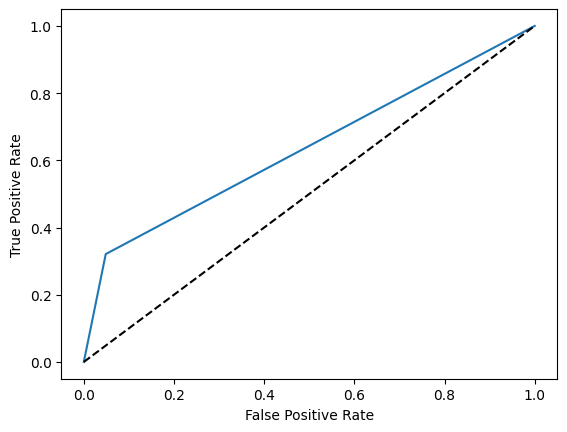

In [32]:
start_time = time.time()
svm_model = SVC(**best_svm_hyperparams).fit(SL_X_train, SL_y_train)
end_time = time.time()
print(f'Training runtime: {(end_time - start_time):.2f} seconds')
print_evaluation_report(SL_y_test, svm_model.predict(SL_X_test))

# Semi-Supervised Learning

## Self-Training Algorithm

In [33]:
SSL_X = pd.concat([SSL_X_train_over_sampled, SSL_X_pool], axis=0)
SSL_y = pd.concat([SSL_y_train_over_sampled, pd.Series(-1, index=range(SSL_y_pool.size))])

Confusion Matrix:
[[  38  177]
 [  25 1456]]



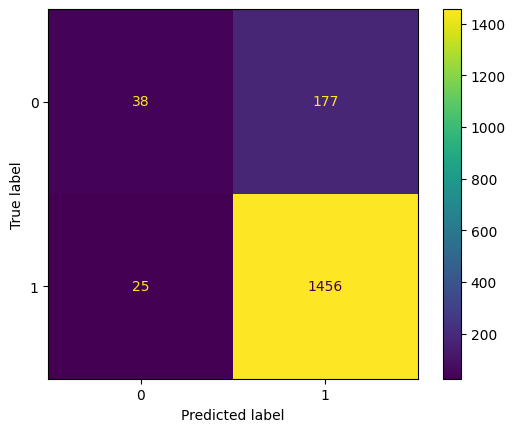


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1481
           1       0.60      0.18      0.27       215

    accuracy                           0.88      1696
   macro avg       0.75      0.58      0.60      1696
weighted avg       0.86      0.88      0.85      1696


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.60


ROC Curve:



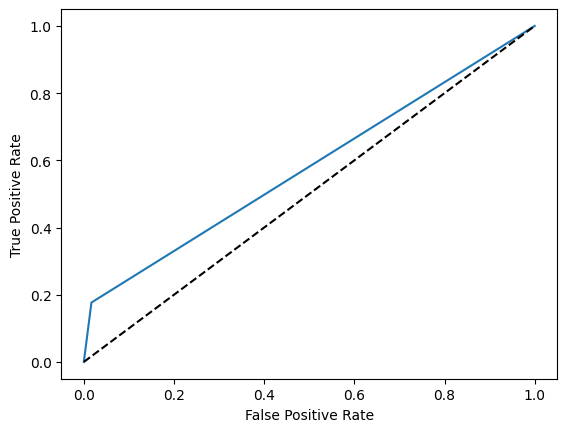

In [34]:
self_training_model = SelfTrainingClassifier(XGBClassifier(**best_xgb_hyperparams))
self_training_model.fit(SSL_X, SSL_y)
print_evaluation_report(SSL_y_test, self_training_model.predict(SSL_X_test))

## Co-Training Algorithm

In [35]:
co_training_model = Co_Training(base_estimator=XGBClassifier(**best_xgb_hyperparams), base_estimator_2=SVC(**best_svm_hyperparams), s=(len(SSL_X_train_over_sampled)+len(SSL_X_pool))//10)

co_training_model.fit(SSL_X_train_over_sampled.to_numpy(), SSL_y_train_over_sampled.to_numpy(), SSL_X_pool.to_numpy())

Co_Training(base_estimator=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=0.5, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=0.0, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.066943920357412,
                                         max_bin=None, max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=17,
                                         max_leaves=None, min_child_weight=1,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=None,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=None, ...),
            base_estimator_2=SVC(C=69.64887301544833, degree=1,
                                 probability=True),
            s=551)

Confusion Matrix:
[[ 200   15]
 [1292  189]]



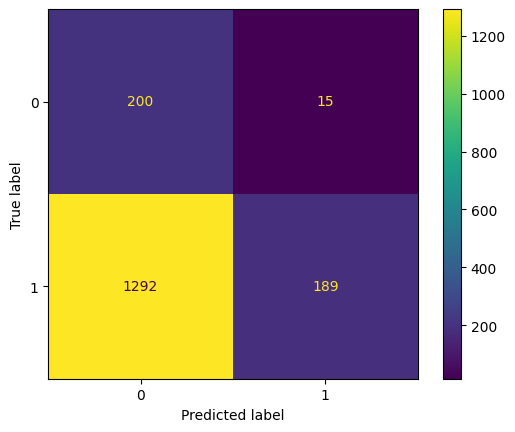


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.13      0.22      1481
           1       0.13      0.93      0.23       215

    accuracy                           0.23      1696
   macro avg       0.53      0.53      0.23      1696
weighted avg       0.83      0.23      0.23      1696


Accuracy: 0.23
Micro F1 score: 0.23
Macro F1 score: 0.23


ROC Curve:



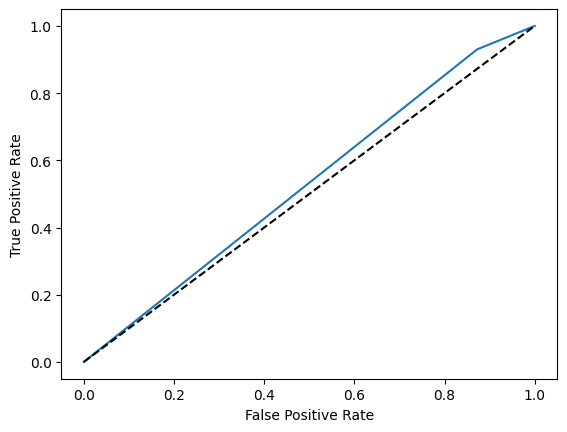

In [36]:
print_evaluation_report(SSL_y_test, co_training_model.predict(SSL_X_test.to_numpy()))

## Semi-Supervised Ensemble

In [37]:
semi_boost_model = SemiBoost(base_estimator=SVC(**best_svm_hyperparams), similarity_kernel='rbf', n_neighbors=4, gamma=0.1, T=300, sample_percent=0.01, sigma_percentile=90)

semi_boost_model.fit(SSL_X_train_over_sampled.to_numpy(), SSL_y_train_over_sampled.to_numpy(), SSL_X_pool.to_numpy())

SemiBoost(base_estimator=SVC(C=69.64887301544833, degree=1, probability=True),
          gamma=0.1)

Confusion Matrix:
[[  49  166]
 [  78 1403]]



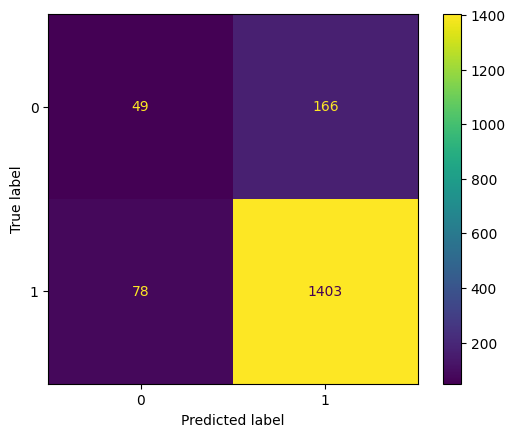


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1481
           1       0.39      0.23      0.29       215

    accuracy                           0.86      1696
   macro avg       0.64      0.59      0.60      1696
weighted avg       0.83      0.86      0.84      1696


Accuracy: 0.86
Micro F1 score: 0.86
Macro F1 score: 0.60


ROC Curve:



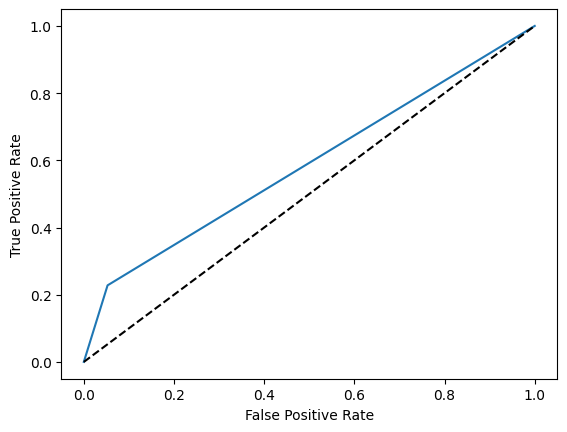

In [38]:
print_evaluation_report(SSL_y_test, semi_boost_model.predict(SSL_X_test.to_numpy()))

#  Intrinsically Semi-Supervised Learning Method (Label Propagation)

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Confusion Matrix:
[[  72  143]
 [ 105 1376]]



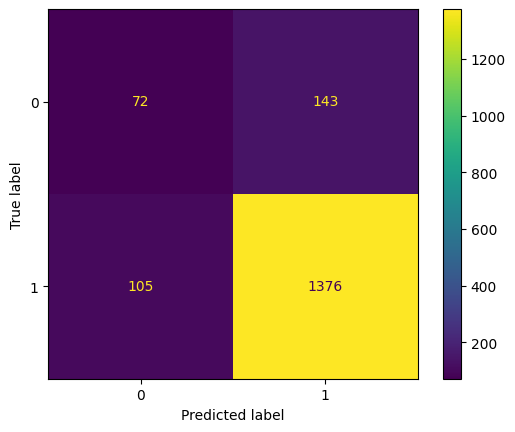


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1481
           1       0.41      0.33      0.37       215

    accuracy                           0.85      1696
   macro avg       0.66      0.63      0.64      1696
weighted avg       0.84      0.85      0.85      1696


Accuracy: 0.85
Micro F1 score: 0.85
Macro F1 score: 0.64


ROC Curve:



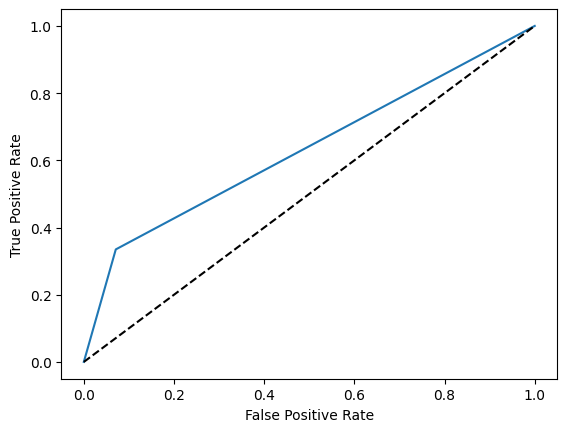

In [39]:
SSL_X = pd.concat([SSL_X_train_over_sampled, SSL_X_pool], axis=0)
SSL_y = pd.concat([SSL_y_train_over_sampled, pd.Series(-1, index=range(SSL_y_pool.size))])

sklearn_label_prop_model = sklearn_LabelPropagation()
sklearn_label_prop_model.fit(SSL_X, SSL_y)
print_evaluation_report(SSL_y_test, sklearn_label_prop_model.predict(SSL_X_test))

# Evaluation of results

In [40]:
def preprocess_semi_supervised_learning(sample_frac, test_size, unlabeled_size):
  data = bank_marketing_df.copy().sample(frac=sample_frac)

  train_size = 1 - unlabeled_size
  test_size = test_size

  target_col = 'y'
  labels = data[target_col]
  data = data.drop(target_col, axis=1)

  data_remaining, data_test, label_remaining, label_test = train_test_split(data, labels, test_size=test_size, random_state=42)
  data_pool, data_train, label_pool, label_train = train_test_split(data_remaining, label_remaining, test_size=train_size, random_state=42)

  data_train[target_col] = label_train
  data_pool[target_col] = label_pool
  data_test[target_col] = label_test

  preprocessor = Preprocessor(data_train, data_pool,data_test, pool_flag = True)
  train_processed, pool_processed, test_processed = preprocessor.preprocess()

  print(train_processed.info())
  print(pool_processed.info())
  print(test_processed.info())

  SSL_X_train = train_processed
  SSL_y_train = SSL_X_train[target_col]
  SSL_X_train = SSL_X_train.drop(target_col, axis=1)

  SSL_X_pool = pool_processed
  SSL_y_pool = SSL_X_pool[target_col]
  SSL_X_pool = SSL_X_pool.drop(target_col, axis=1)

  SSL_X_test = test_processed
  SSL_y_test = SSL_X_test[target_col]
  SSL_X_test = SSL_X_test.drop(target_col, axis=1)

  print(SSL_y_train.value_counts())
  print(SSL_y_test.value_counts())
  print(SSL_y_pool.value_counts())

  print(SSL_X_train.shape)
  print(SSL_y_test.shape)
  print(SSL_y_pool.shape)

  return SSL_X_train, SSL_y_train, SSL_X_pool, SSL_y_pool, SSL_X_test, SSL_y_test

In [41]:
def evaluate_semi_supervised_learning_algorithms(sample_frac, base_SL_model, base_SL_model_2, balance):
  reports = [[], [], [], []]
  for unlabeled_size in [0.5, 0.75, 0.9, 0.95, 0.99]:
    SSL_X_train, SSL_y_train, SSL_X_pool, SSL_y_pool, SSL_X_test, SSL_y_test = preprocess_semi_supervised_learning(sample_frac, 0.25, unlabeled_size)

    SSL_X_train_over_sampled, SSL_y_train_over_sampled = BorderlineSMOTE().fit_resample(SSL_X_train, SSL_y_train)
    SSL_y_train_over_sampled.value_counts()

    print(f'Semi-Supervised Learning Self-Training Algorithm - Level of Unlabelled Data: {unlabeled_size}')
    # Self-Training

    if balance == True:
      SSL_X = pd.concat([SSL_X_train_over_sampled, SSL_X_pool], axis=0)
      SSL_y = pd.concat([SSL_y_train_over_sampled, pd.Series(-1, index=range(SSL_y_pool.size))])
    else:
      SSL_X = pd.concat([SSL_X_train, SSL_X_pool], axis=0)
      SSL_y = pd.concat([SSL_y_train, pd.Series(-1, index=range(SSL_y_pool.size))])

    start_time = time.time()

    self_training_model = SelfTrainingClassifier(base_SL_model)
    self_training_model.fit(SSL_X, SSL_y)

    end_time = time.time()
    print(f'Training runtime: {(end_time - start_time):.2f} seconds')

    #
    self_training_y_pred = self_training_model.predict(SSL_X_test)
    print_evaluation_report(SSL_y_test, self_training_y_pred)

    reports[0].append(f1_score(SSL_y_test, self_training_y_pred, average="macro"))
    #

    print(f'Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: {unlabeled_size}')
    # Co-Training

    start_time = time.time()

    if balance == True:
      co_training_model = Co_Training(base_estimator=base_SL_model, base_estimator_2=base_SL_model_2, s=(len(SSL_X_train_over_sampled)+len(SSL_X_pool))//10)
      co_training_model.fit(SSL_X_train_over_sampled.to_numpy(), SSL_y_train_over_sampled.to_numpy(), SSL_X_pool.to_numpy())
    else:
      co_training_model = Co_Training(base_estimator=base_SL_model, base_estimator_2=base_SL_model_2, s=(len(SSL_X_train)+len(SSL_X_pool))//10)
      co_training_model.fit(SSL_X_train.to_numpy(), SSL_y_train.to_numpy(), SSL_X_pool.to_numpy())

    end_time = time.time()
    print(f'Training runtime: {(end_time - start_time):.2f} seconds')

    co_training_y_pred = co_training_model.predict(SSL_X_test.to_numpy())
    print_evaluation_report(SSL_y_test, co_training_y_pred)

    reports[1].append(f1_score(SSL_y_test, co_training_y_pred, average="macro"))
    #

    print(f'Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: {unlabeled_size}')
    # Semi-Supervised Ensemble

    start_time = time.time()

    semi_boost_model = SemiBoost(base_estimator=base_SL_model_2, similarity_kernel='rbf', n_neighbors=4, gamma=0.1, T=300, sample_percent=0.01, sigma_percentile=90)

    if balance == True:
      semi_boost_model.fit(SSL_X_train_over_sampled.to_numpy(), SSL_y_train_over_sampled.to_numpy(), SSL_X_pool.to_numpy())
    else:
      semi_boost_model.fit(SSL_X_train.to_numpy(), SSL_y_train.to_numpy(), SSL_X_pool.to_numpy())

    end_time = time.time()
    print(f'Training runtime: {(end_time - start_time):.2f} seconds')

    semi_boost_y_pred = semi_boost_model.predict(SSL_X_test.to_numpy())
    print_evaluation_report(SSL_y_test, semi_boost_y_pred)

    reports[2].append(f1_score(SSL_y_test, semi_boost_y_pred, average="macro"))
    #

    print(f'Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: {unlabeled_size}')
    # Intrinsically Semi-Supervised Learning Method (Label Propagation)

    if balance == True:
      SSL_X = pd.concat([SSL_X_train_over_sampled, SSL_X_pool], axis=0)
      SSL_y = pd.concat([SSL_y_train_over_sampled, pd.Series(-1, index=range(SSL_y_pool.size))])
    else:
      SSL_X = pd.concat([SSL_X_train, SSL_X_pool], axis=0)
      SSL_y = pd.concat([SSL_y_train, pd.Series(-1, index=range(SSL_y_pool.size))])

    start_time = time.time()

    sklearn_label_prop_model = sklearn_LabelPropagation()
    sklearn_label_prop_model.fit(SSL_X, SSL_y)

    end_time = time.time()
    print(f'Training runtime: {(end_time - start_time):.2f} seconds')

    sklearn_label_prop_y_pred = sklearn_label_prop_model.predict(SSL_X_test)
    print_evaluation_report(SSL_y_test, sklearn_label_prop_y_pred)

    reports[3].append(f1_score(SSL_y_test, sklearn_label_prop_y_pred, average="macro"))
    #

  return reports

In [42]:
def apply_friedman_test(reports):
  print('Performance Comparison of Semi-Supervised Learning Algorithms')
  friedman_stat, p_value = friedmanchisquare(*reports)
  print(f"Friedman Test:\nstatistic: {(friedman_stat):.2f} P-value: {(p_value):.2f}")

  if p_value < 0.05:
      print('There are statistical differences between the performances of the algorithms.')
      print(f'Nemenyi post-hoc Test:\n{posthoc_nemenyi_friedman(np.array(reports).T)}')
  else:
      print("There are no statistical differences between the performances of the algorithms.")

## Imbalanced Data

31531    0
23190    0
42734    0
17916    0
6992     0
        ..
32006    0
26563    0
11300    0
42276    0
43919    0
Name: y, Length: 4239, dtype: int64
Feature: 0, Score: 0.05697
Feature: 1, Score: 0.04930
Feature: 2, Score: 0.04065
Feature: 3, Score: 0.04695
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04398
Feature: 6, Score: 0.17754
Feature: 7, Score: 0.09411
Feature: 8, Score: 0.02260
Feature: 9, Score: 0.05236
Feature: 10, Score: 0.06042
Feature: 11, Score: 0.13248
Feature: 12, Score: 0.05548
Feature: 13, Score: 0.11493
Feature: 14, Score: 0.05221
<class 'pandas.core.frame.DataFrame'>
Index: 4239 entries, 31531 to 43919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4239 non-null   float64
 1   job          4239 non-null   float64
 2   marital      4239 non-null   float64
 3   education    4239 non-null   float64
 4   balance      4239 non-null   float64
 5   housing      4239 non-null 

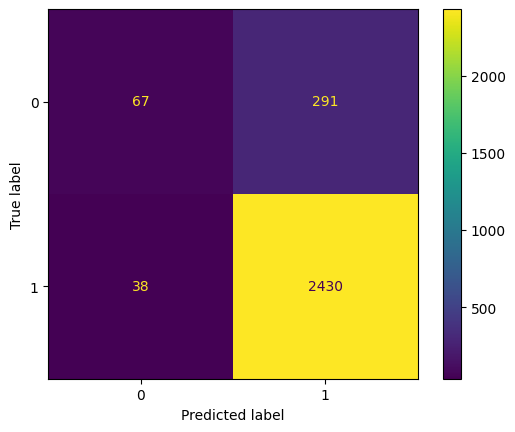


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2468
           1       0.64      0.19      0.29       358

    accuracy                           0.88      2826
   macro avg       0.77      0.59      0.61      2826
weighted avg       0.86      0.88      0.85      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.61


ROC Curve:



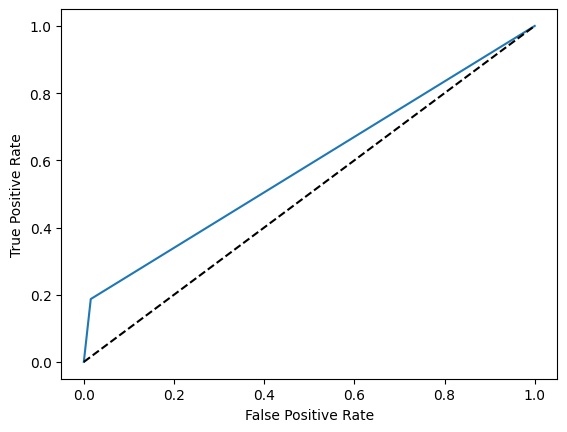

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.5
Training runtime: 892.86 seconds
Confusion Matrix:
[[  67  291]
 [  86 2382]]



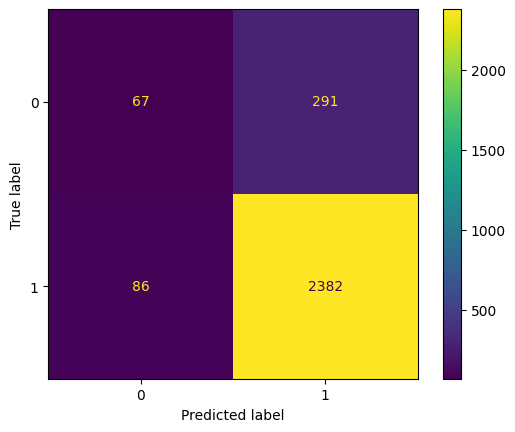


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2468
           1       0.44      0.19      0.26       358

    accuracy                           0.87      2826
   macro avg       0.66      0.58      0.59      2826
weighted avg       0.83      0.87      0.84      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.59


ROC Curve:



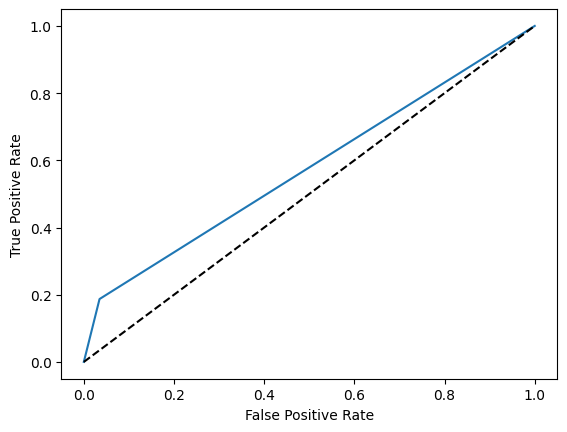

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.5
Training runtime: 287.74 seconds
Confusion Matrix:
[[  74  284]
 [  81 2387]]



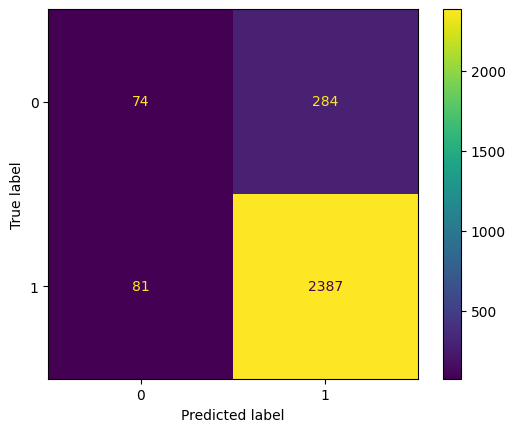


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2468
           1       0.48      0.21      0.29       358

    accuracy                           0.87      2826
   macro avg       0.69      0.59      0.61      2826
weighted avg       0.84      0.87      0.85      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.61


ROC Curve:



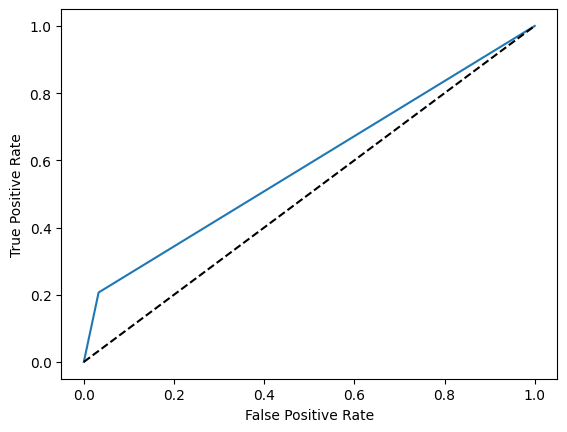

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 208.22 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Confusion Matrix:
[[ 118  240]
 [ 162 2306]]



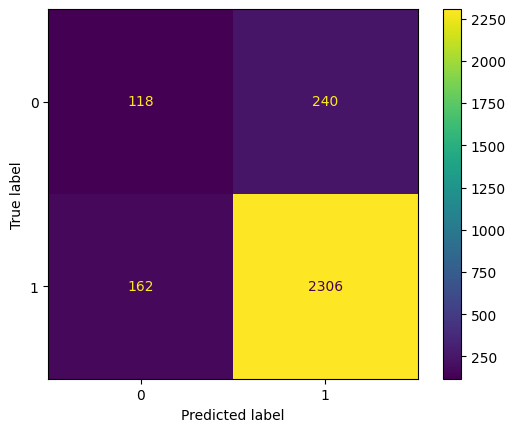


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2468
           1       0.42      0.33      0.37       358

    accuracy                           0.86      2826
   macro avg       0.66      0.63      0.64      2826
weighted avg       0.84      0.86      0.85      2826


Accuracy: 0.86
Micro F1 score: 0.86
Macro F1 score: 0.64


ROC Curve:



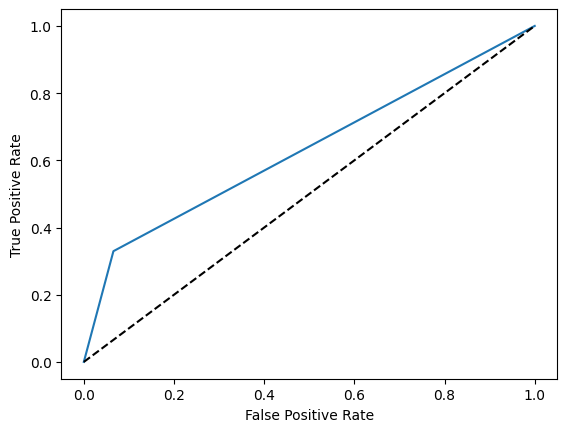

11404    0
10781    0
12981    0
9943     0
41850    0
        ..
40955    0
18799    0
21281    0
37787    0
9680     0
Name: y, Length: 2120, dtype: int64
Feature: 0, Score: 0.04793
Feature: 1, Score: 0.05669
Feature: 2, Score: 0.04786
Feature: 3, Score: 0.05163
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04934
Feature: 6, Score: 0.14188
Feature: 7, Score: 0.08771
Feature: 8, Score: 0.07066
Feature: 9, Score: 0.04761
Feature: 10, Score: 0.06046
Feature: 11, Score: 0.12327
Feature: 12, Score: 0.05151
Feature: 13, Score: 0.11247
Feature: 14, Score: 0.05096
<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 11404 to 9680
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2120 non-null   float64
 1   job          2120 non-null   float64
 2   marital      2120 non-null   float64
 3   education    2120 non-null   float64
 4   balance      2120 non-null   float64
 5   housing      2120 non-null  

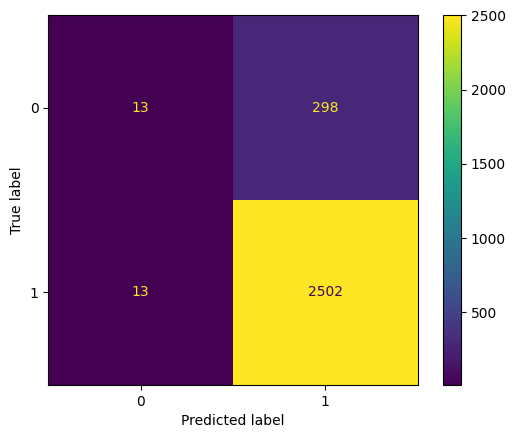


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2515
           1       0.50      0.04      0.08       311

    accuracy                           0.89      2826
   macro avg       0.70      0.52      0.51      2826
weighted avg       0.85      0.89      0.85      2826


Accuracy: 0.89
Micro F1 score: 0.89
Macro F1 score: 0.51


ROC Curve:



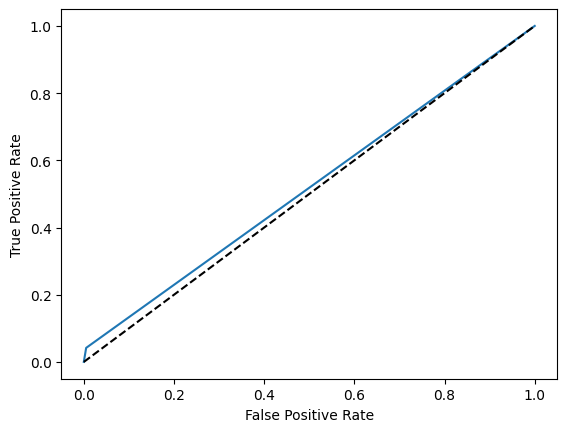

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.75
Training runtime: 650.43 seconds
Confusion Matrix:
[[ 159  152]
 [ 545 1970]]



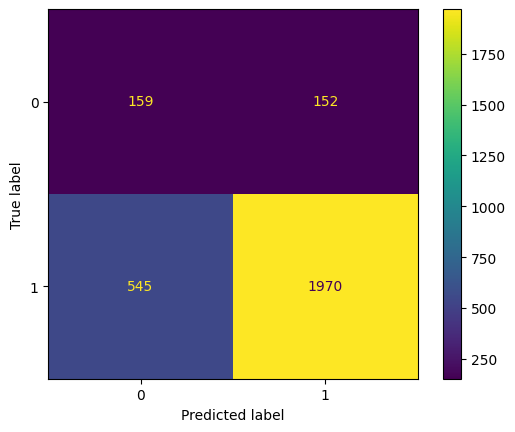


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2515
           1       0.23      0.51      0.31       311

    accuracy                           0.75      2826
   macro avg       0.58      0.65      0.58      2826
weighted avg       0.85      0.75      0.79      2826


Accuracy: 0.75
Micro F1 score: 0.75
Macro F1 score: 0.58


ROC Curve:



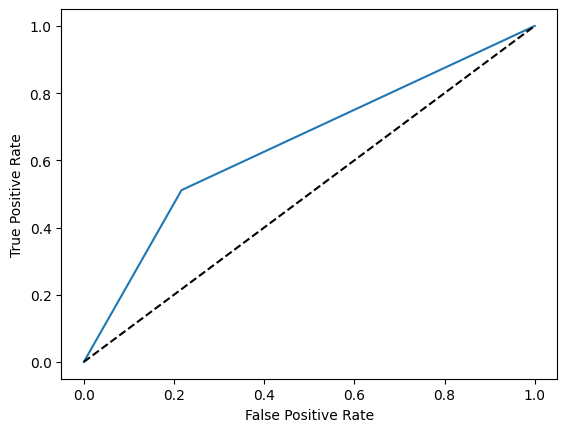

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.75
Training runtime: 312.03 seconds
Confusion Matrix:
[[  28  283]
 [  48 2467]]



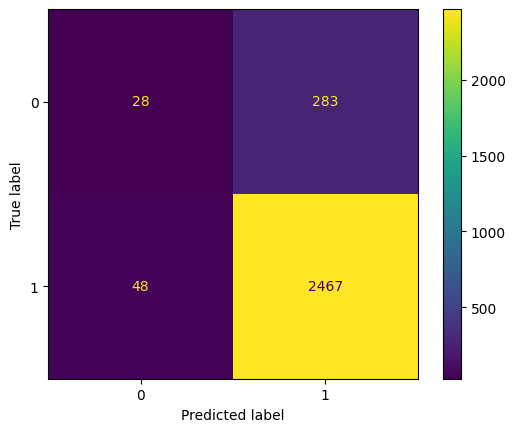


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2515
           1       0.37      0.09      0.14       311

    accuracy                           0.88      2826
   macro avg       0.63      0.54      0.54      2826
weighted avg       0.84      0.88      0.85      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.54


ROC Curve:



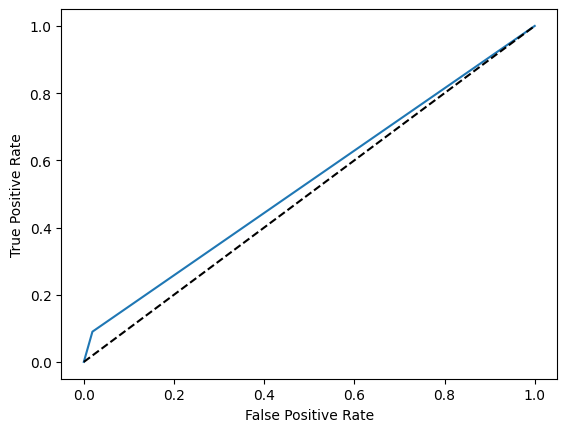

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 212.39 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Confusion Matrix:
[[  86  225]
 [ 150 2365]]



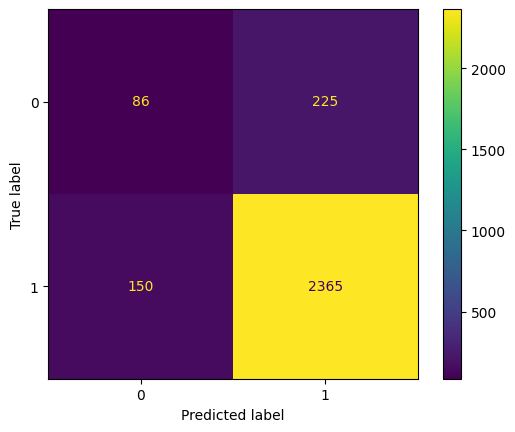


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2515
           1       0.36      0.28      0.31       311

    accuracy                           0.87      2826
   macro avg       0.64      0.61      0.62      2826
weighted avg       0.85      0.87      0.86      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.62


ROC Curve:



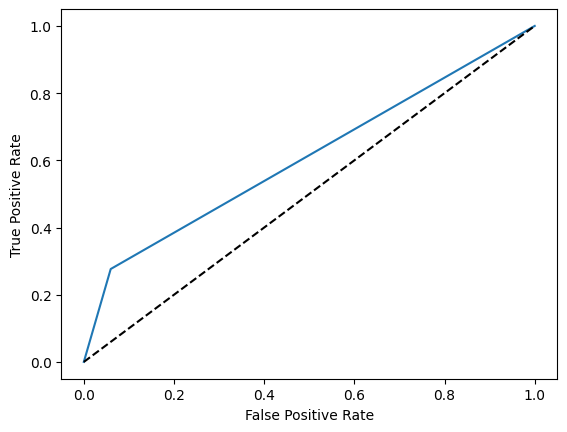

7757     0
11593    0
43653    1
16230    1
21476    0
        ..
36990    0
31067    0
32753    0
1724     0
31698    0
Name: y, Length: 848, dtype: int64
Feature: 0, Score: 0.05873
Feature: 1, Score: 0.06461
Feature: 2, Score: 0.07417
Feature: 3, Score: 0.06025
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04766
Feature: 6, Score: 0.14093
Feature: 7, Score: 0.03322
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.05440
Feature: 10, Score: 0.04689
Feature: 11, Score: 0.17506
Feature: 12, Score: 0.04313
Feature: 13, Score: 0.13075
Feature: 14, Score: 0.07019
<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 7757 to 31698
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          848 non-null    float64
 1   job          848 non-null    float64
 2   marital      848 non-null    float64
 3   education    848 non-null    float64
 4   balance      848 non-null    float64
 5   housing      848 non-null    f

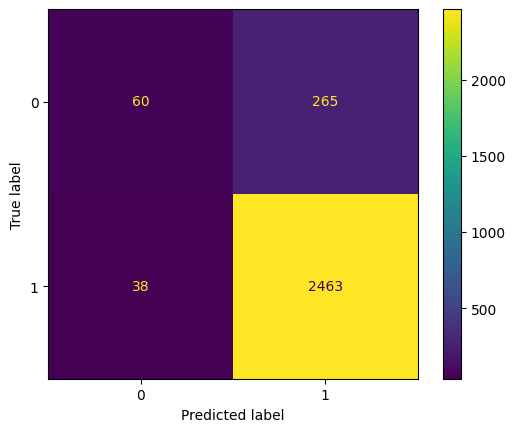


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2501
           1       0.61      0.18      0.28       325

    accuracy                           0.89      2826
   macro avg       0.76      0.58      0.61      2826
weighted avg       0.87      0.89      0.87      2826


Accuracy: 0.89
Micro F1 score: 0.89
Macro F1 score: 0.61


ROC Curve:



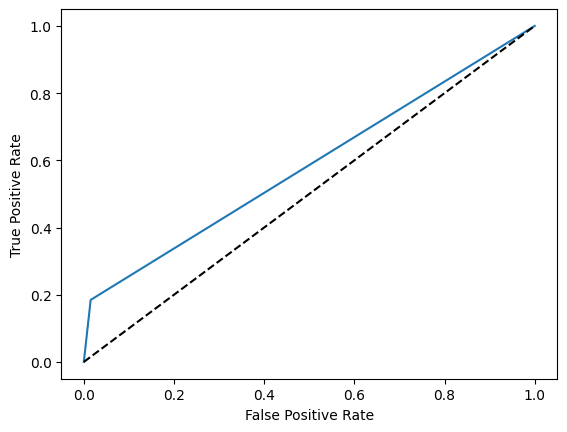

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.9
Training runtime: 284.72 seconds
Confusion Matrix:
[[ 287   38]
 [1969  532]]



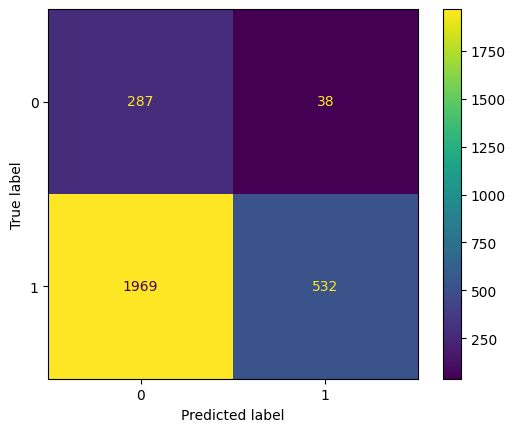


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.21      0.35      2501
           1       0.13      0.88      0.22       325

    accuracy                           0.29      2826
   macro avg       0.53      0.55      0.28      2826
weighted avg       0.84      0.29      0.33      2826


Accuracy: 0.29
Micro F1 score: 0.29
Macro F1 score: 0.28


ROC Curve:



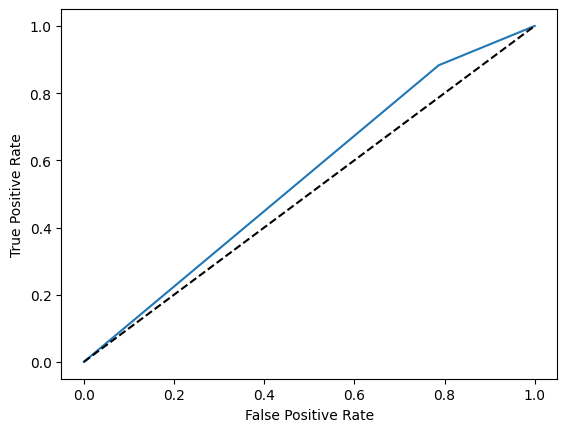

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.9
Training runtime: 375.87 seconds
Confusion Matrix:
[[  13  312]
 [  43 2458]]



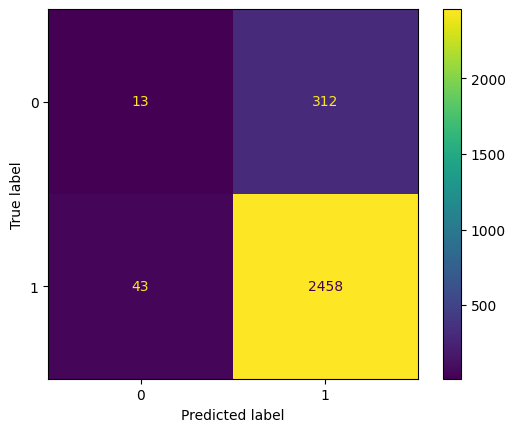


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2501
           1       0.23      0.04      0.07       325

    accuracy                           0.87      2826
   macro avg       0.56      0.51      0.50      2826
weighted avg       0.81      0.87      0.83      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.50


ROC Curve:



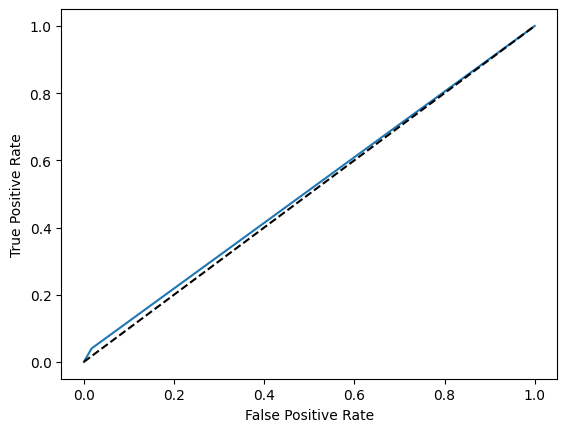

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 198.23 seconds
Confusion Matrix:
[[  84  241]
 [ 163 2338]]



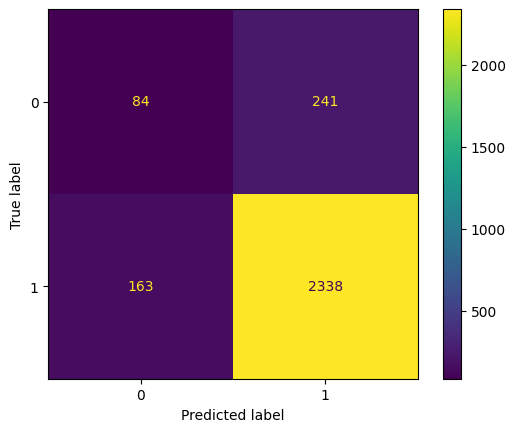


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2501
           1       0.34      0.26      0.29       325

    accuracy                           0.86      2826
   macro avg       0.62      0.60      0.61      2826
weighted avg       0.84      0.86      0.85      2826


Accuracy: 0.86
Micro F1 score: 0.86
Macro F1 score: 0.61


ROC Curve:



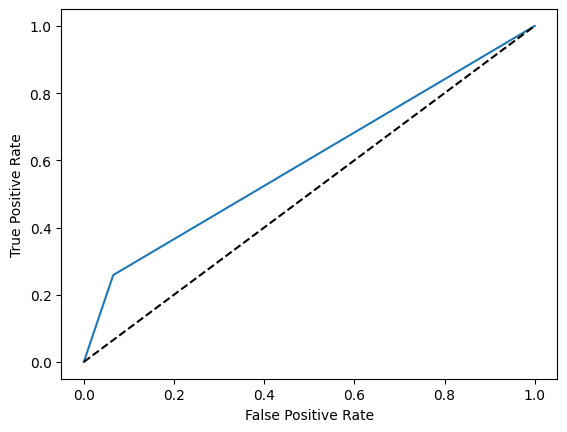

19952    0
9924     0
32344    0
21951    0
7286     0
        ..
17879    0
36539    0
36043    0
1747     0
1926     0
Name: y, Length: 424, dtype: int64
Feature: 0, Score: 0.06405
Feature: 1, Score: 0.06401
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.08970
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06446
Feature: 6, Score: 0.12524
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.04689
Feature: 10, Score: 0.03615
Feature: 11, Score: 0.19625
Feature: 12, Score: 0.07319
Feature: 13, Score: 0.11614
Feature: 14, Score: 0.12393
<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 19952 to 1926
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          424 non-null    float64
 1   job          424 non-null    float64
 2   education    424 non-null    float64
 3   balance      424 non-null    float64
 4   housing      424 non-null    float64
 5   day_of_week  424 non-null    f

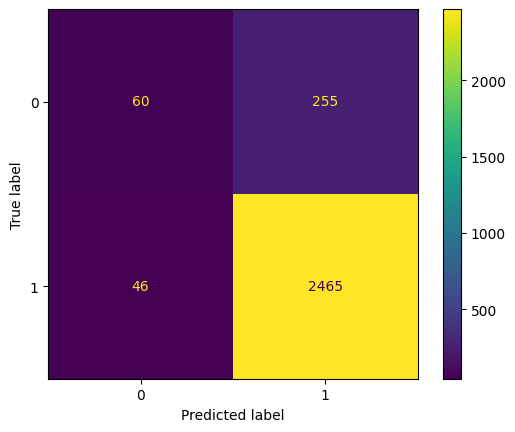


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2511
           1       0.57      0.19      0.29       315

    accuracy                           0.89      2826
   macro avg       0.74      0.59      0.61      2826
weighted avg       0.87      0.89      0.87      2826


Accuracy: 0.89
Micro F1 score: 0.89
Macro F1 score: 0.61


ROC Curve:



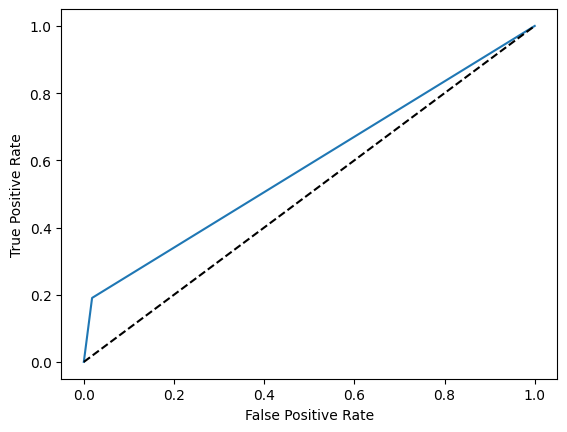

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.95
Training runtime: 169.95 seconds
Confusion Matrix:
[[ 306    9]
 [2339  172]]



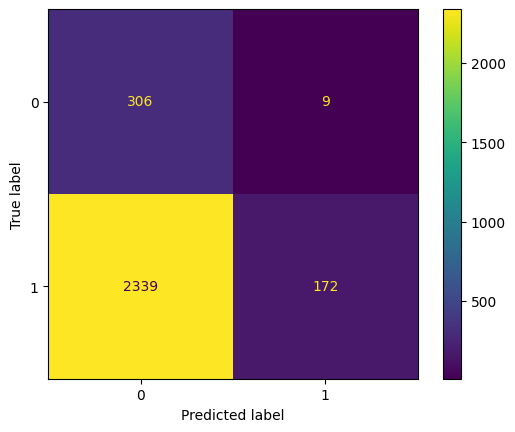


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.07      0.13      2511
           1       0.12      0.97      0.21       315

    accuracy                           0.17      2826
   macro avg       0.53      0.52      0.17      2826
weighted avg       0.86      0.17      0.14      2826


Accuracy: 0.17
Micro F1 score: 0.17
Macro F1 score: 0.17


ROC Curve:



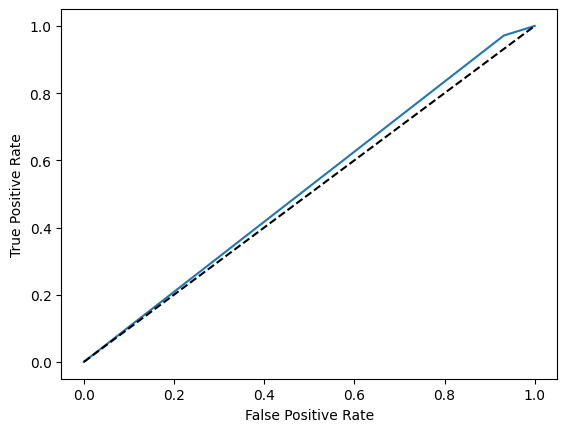

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.95
Training runtime: 312.21 seconds
Confusion Matrix:
[[  19  296]
 [  30 2481]]



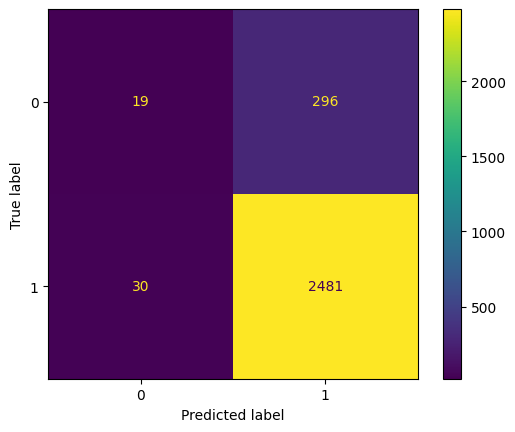


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2511
           1       0.39      0.06      0.10       315

    accuracy                           0.88      2826
   macro avg       0.64      0.52      0.52      2826
weighted avg       0.84      0.88      0.85      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.52


ROC Curve:



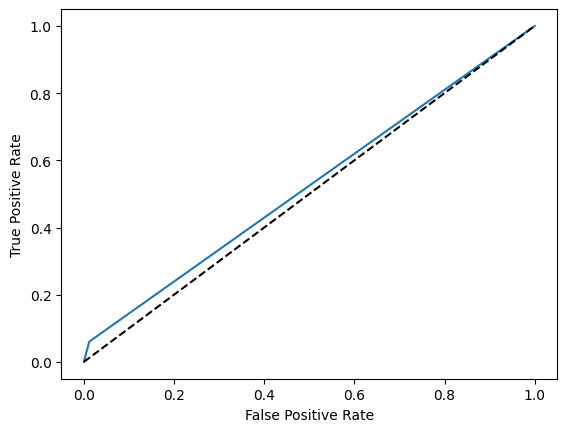

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 180.27 seconds
Confusion Matrix:
[[  88  227]
 [ 127 2384]]



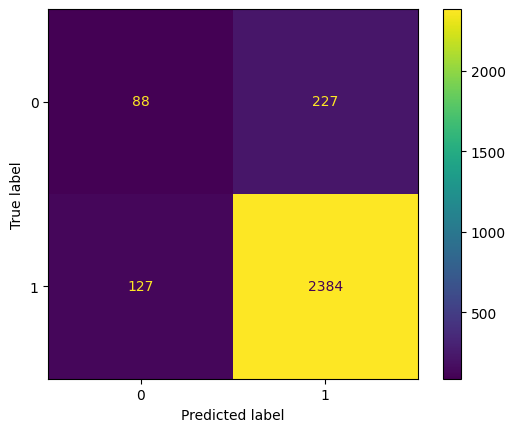


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2511
           1       0.41      0.28      0.33       315

    accuracy                           0.87      2826
   macro avg       0.66      0.61      0.63      2826
weighted avg       0.86      0.87      0.86      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.63


ROC Curve:



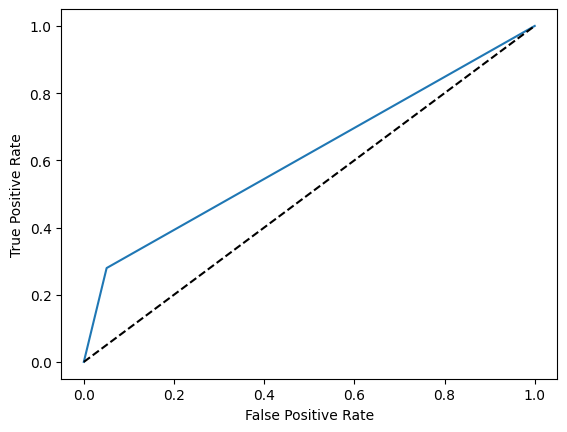

34644    0
43754    0
9705     0
8013     0
29364    0
        ..
34335    1
11675    0
1763     0
24638    0
40498    0
Name: y, Length: 85, dtype: int64
Feature: 0, Score: 0.10697
Feature: 1, Score: 0.06822
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.17462
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.05027
Feature: 6, Score: 0.04706
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06544
Feature: 10, Score: 0.16034
Feature: 11, Score: 0.20497
Feature: 12, Score: 0.05969
Feature: 13, Score: 0.06244
Feature: 14, Score: 0.00000
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 34644 to 40498
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          85 non-null     float64
 1   job          85 non-null     float64
 2   education    85 non-null     float64
 3   balance      85 non-null     float64
 4   housing      85 non-null     float64
 5   day_of_week  85 non-null     fl

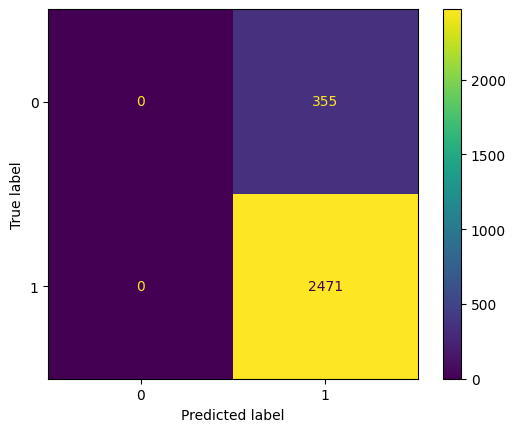

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2471
           1       0.00      0.00      0.00       355

    accuracy                           0.87      2826
   macro avg       0.44      0.50      0.47      2826
weighted avg       0.76      0.87      0.82      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.47


ROC Curve:



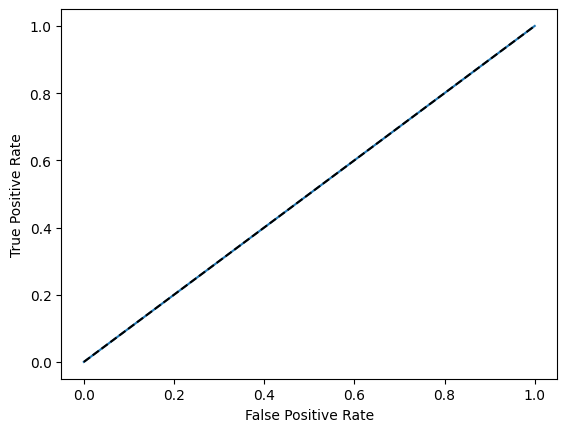

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.99
Training runtime: 136.02 seconds
Confusion Matrix:
[[ 353    2]
 [2392   79]]



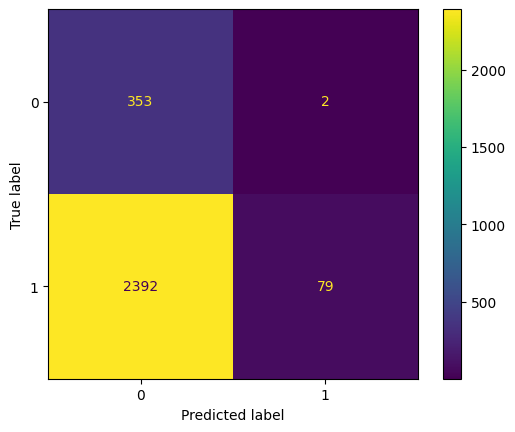


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.03      0.06      2471
           1       0.13      0.99      0.23       355

    accuracy                           0.15      2826
   macro avg       0.55      0.51      0.14      2826
weighted avg       0.87      0.15      0.08      2826


Accuracy: 0.15
Micro F1 score: 0.15
Macro F1 score: 0.14


ROC Curve:



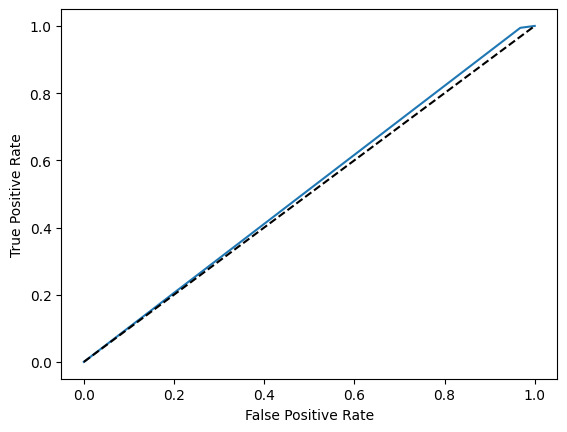

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.99
Training runtime: 250.22 seconds
Confusion Matrix:
[[  19  336]
 [  26 2445]]



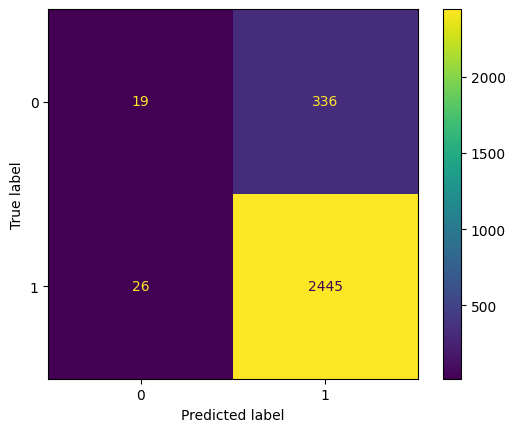


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2471
           1       0.42      0.05      0.10       355

    accuracy                           0.87      2826
   macro avg       0.65      0.52      0.51      2826
weighted avg       0.82      0.87      0.83      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.51


ROC Curve:



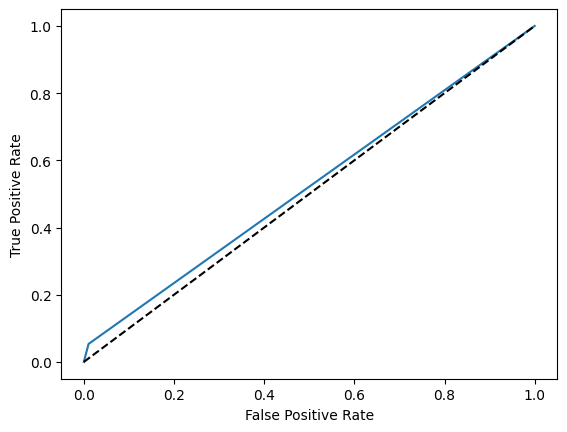

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 179.86 seconds
Confusion Matrix:
[[  63  292]
 [ 120 2351]]



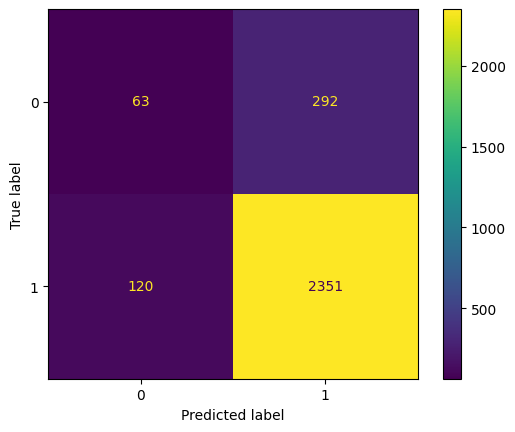


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2471
           1       0.34      0.18      0.23       355

    accuracy                           0.85      2826
   macro avg       0.62      0.56      0.58      2826
weighted avg       0.82      0.85      0.83      2826


Accuracy: 0.85
Micro F1 score: 0.85
Macro F1 score: 0.58


ROC Curve:



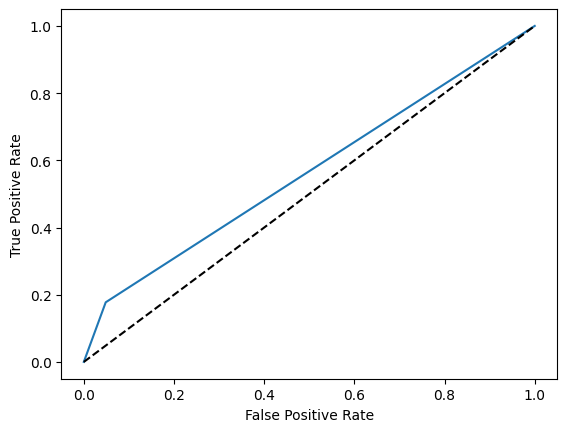

In [43]:
# evaluation_reports = evaluate_semi_supervised_learning_algorithms(0.15, XGBClassifier(), SVC(probability=True))
evaluation_reports = evaluate_semi_supervised_learning_algorithms(0.25, XGBClassifier(**best_xgb_hyperparams), SVC(**best_svm_hyperparams), False)

In [44]:
apply_friedman_test(evaluation_reports)

Performance Comparison of Semi-Supervised Learning Algorithms
Friedman Test:
statistic: 9.00 P-value: 0.03
There are statistical differences between the performances of the algorithms.
Nemenyi post-hoc Test:
          0         1         2         3
0  1.000000  0.457254  0.900000  0.457254
1  0.457254  1.000000  0.735188  0.017331
2  0.900000  0.735188  1.000000  0.203530
3  0.457254  0.017331  0.203530  1.000000


## Balanced Data

33524    0
37116    0
35167    1
17847    0
23993    0
        ..
40189    0
16062    0
19866    0
30505    0
27303    0
Name: y, Length: 4239, dtype: int64
Feature: 0, Score: 0.05009
Feature: 1, Score: 0.04160
Feature: 2, Score: 0.03703
Feature: 3, Score: 0.05022
Feature: 4, Score: 0.04310
Feature: 5, Score: 0.04520
Feature: 6, Score: 0.17671
Feature: 7, Score: 0.06347
Feature: 8, Score: 0.05402
Feature: 9, Score: 0.04636
Feature: 10, Score: 0.05366
Feature: 11, Score: 0.14210
Feature: 12, Score: 0.04998
Feature: 13, Score: 0.08460
Feature: 14, Score: 0.06185
<class 'pandas.core.frame.DataFrame'>
Index: 4239 entries, 33524 to 27303
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4239 non-null   float64
 1   job          4239 non-null   float64
 2   marital      4239 non-null   float64
 3   education    4239 non-null   float64
 4   default      4239 non-null   float64
 5   balance      4239 non-null 

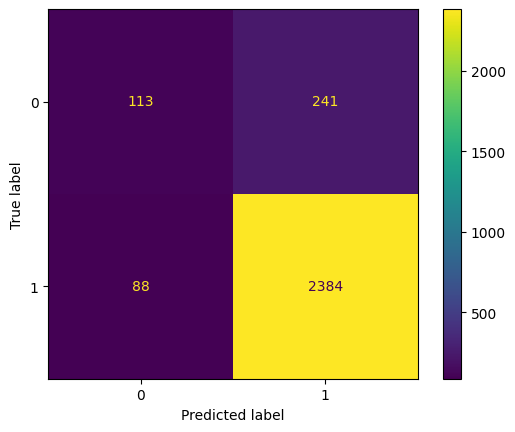


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2472
           1       0.56      0.32      0.41       354

    accuracy                           0.88      2826
   macro avg       0.74      0.64      0.67      2826
weighted avg       0.86      0.88      0.87      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.67


ROC Curve:



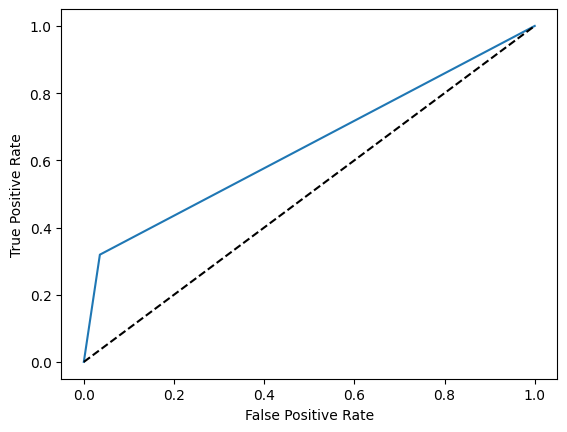

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.5
Training runtime: 1134.76 seconds
Confusion Matrix:
[[ 224  130]
 [ 383 2089]]



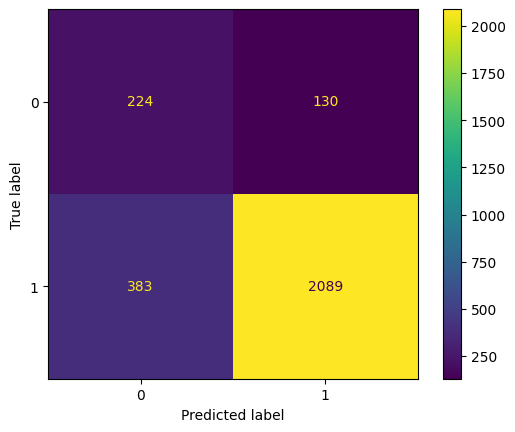


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2472
           1       0.37      0.63      0.47       354

    accuracy                           0.82      2826
   macro avg       0.66      0.74      0.68      2826
weighted avg       0.87      0.82      0.84      2826


Accuracy: 0.82
Micro F1 score: 0.82
Macro F1 score: 0.68


ROC Curve:



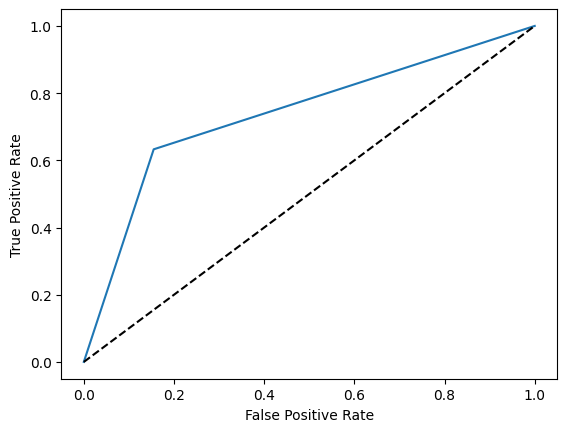

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.5
Training runtime: 1878.64 seconds
Confusion Matrix:
[[ 186  168]
 [ 338 2134]]



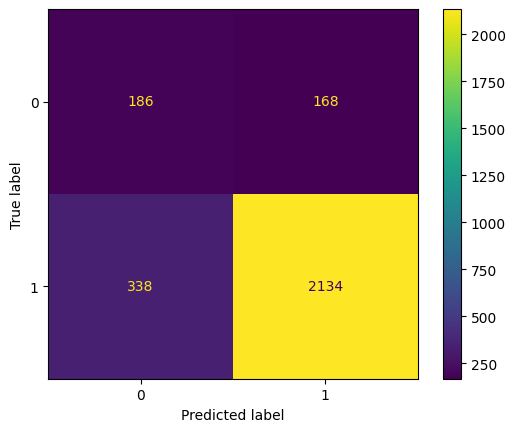


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2472
           1       0.35      0.53      0.42       354

    accuracy                           0.82      2826
   macro avg       0.64      0.69      0.66      2826
weighted avg       0.86      0.82      0.84      2826


Accuracy: 0.82
Micro F1 score: 0.82
Macro F1 score: 0.66


ROC Curve:



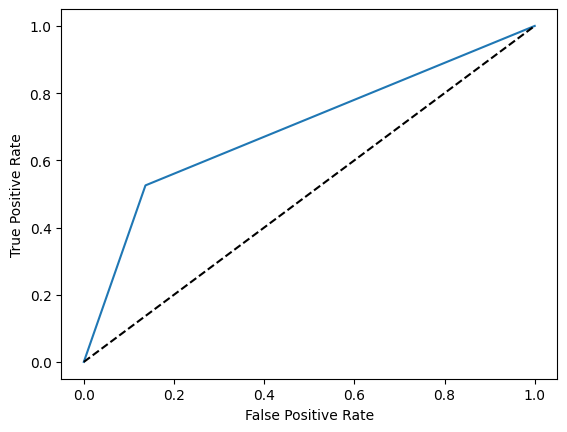

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 420.60 seconds
Confusion Matrix:
[[ 144  210]
 [ 245 2227]]



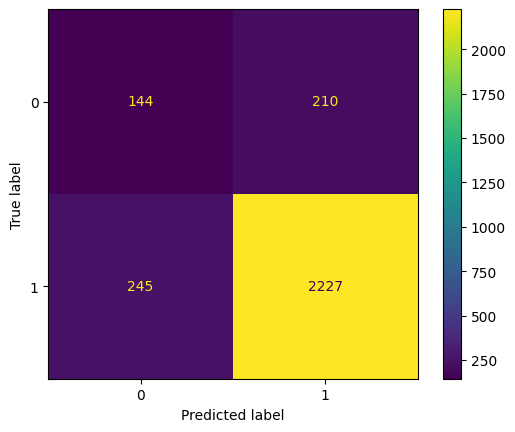


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2472
           1       0.37      0.41      0.39       354

    accuracy                           0.84      2826
   macro avg       0.64      0.65      0.65      2826
weighted avg       0.85      0.84      0.84      2826


Accuracy: 0.84
Micro F1 score: 0.84
Macro F1 score: 0.65


ROC Curve:



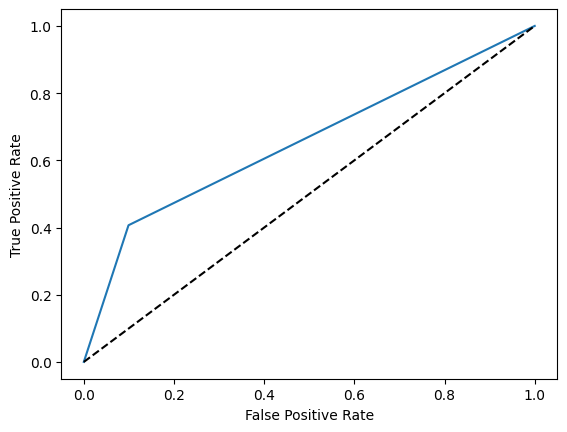

40967    0
18206    0
26286    0
39850    0
24718    0
        ..
18672    0
30359    0
4796     0
16654    0
25388    0
Name: y, Length: 2120, dtype: int64
Feature: 0, Score: 0.04507
Feature: 1, Score: 0.03701
Feature: 2, Score: 0.05576
Feature: 3, Score: 0.03786
Feature: 4, Score: 0.04901
Feature: 5, Score: 0.03503
Feature: 6, Score: 0.10455
Feature: 7, Score: 0.11356
Feature: 8, Score: 0.10616
Feature: 9, Score: 0.03570
Feature: 10, Score: 0.05820
Feature: 11, Score: 0.11590
Feature: 12, Score: 0.05166
Feature: 13, Score: 0.05189
Feature: 14, Score: 0.10265
<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 40967 to 25388
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2120 non-null   float64
 1   job          2120 non-null   float64
 2   marital      2120 non-null   float64
 3   education    2120 non-null   float64
 4   default      2120 non-null   float64
 5   balance      2120 non-null 

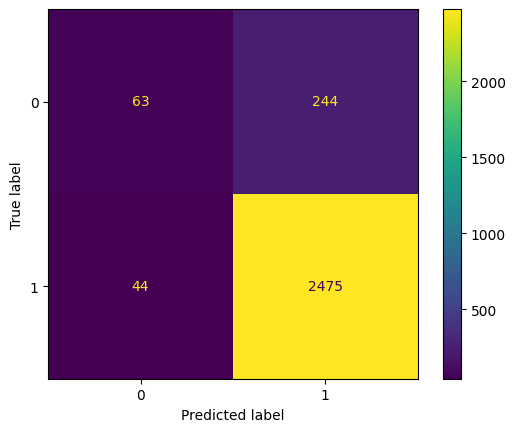


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2519
           1       0.59      0.21      0.30       307

    accuracy                           0.90      2826
   macro avg       0.75      0.59      0.62      2826
weighted avg       0.88      0.90      0.88      2826


Accuracy: 0.90
Micro F1 score: 0.90
Macro F1 score: 0.62


ROC Curve:



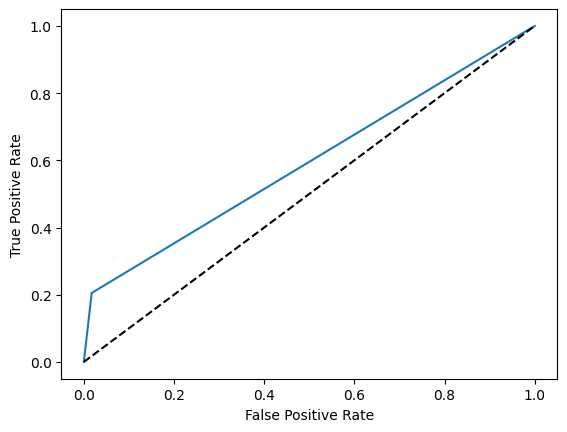

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.75
Training runtime: 951.38 seconds
Confusion Matrix:
[[ 249   58]
 [1025 1494]]



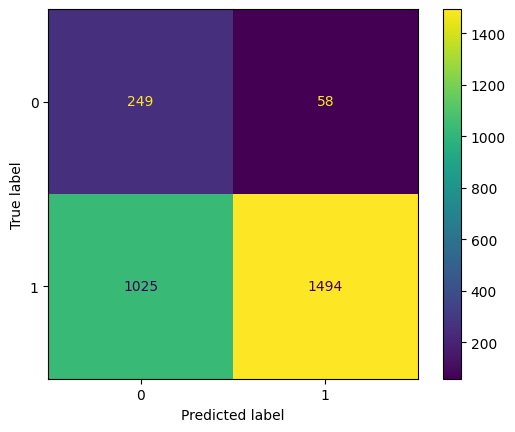


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      2519
           1       0.20      0.81      0.31       307

    accuracy                           0.62      2826
   macro avg       0.58      0.70      0.52      2826
weighted avg       0.88      0.62      0.69      2826


Accuracy: 0.62
Micro F1 score: 0.62
Macro F1 score: 0.52


ROC Curve:



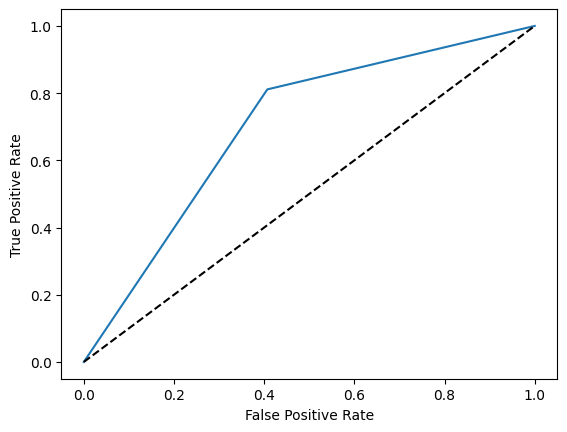

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.75
Training runtime: 1240.38 seconds
Confusion Matrix:
[[ 128  179]
 [ 282 2237]]



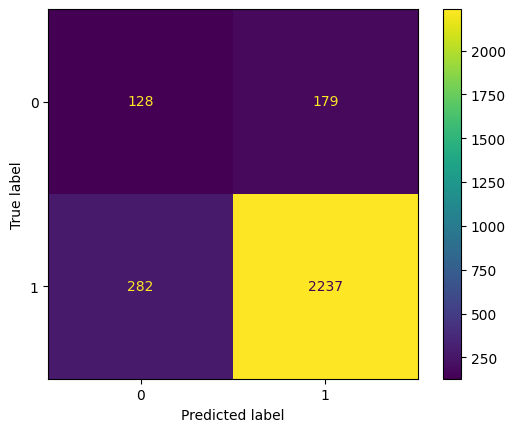


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2519
           1       0.31      0.42      0.36       307

    accuracy                           0.84      2826
   macro avg       0.62      0.65      0.63      2826
weighted avg       0.86      0.84      0.85      2826


Accuracy: 0.84
Micro F1 score: 0.84
Macro F1 score: 0.63


ROC Curve:



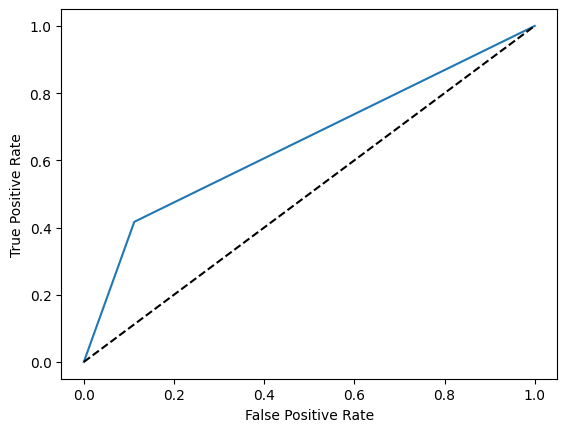

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 307.92 seconds
Confusion Matrix:
[[ 132  175]
 [ 260 2259]]



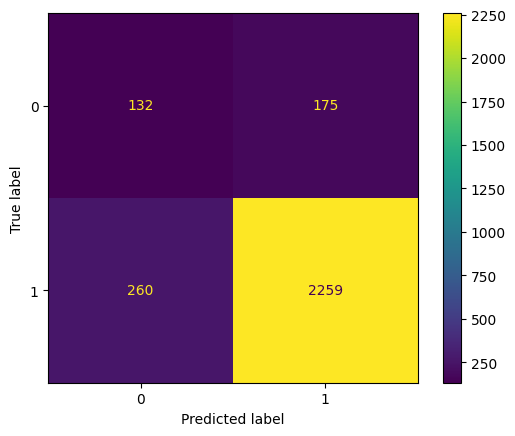


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2519
           1       0.34      0.43      0.38       307

    accuracy                           0.85      2826
   macro avg       0.63      0.66      0.64      2826
weighted avg       0.86      0.85      0.85      2826


Accuracy: 0.85
Micro F1 score: 0.85
Macro F1 score: 0.64


ROC Curve:



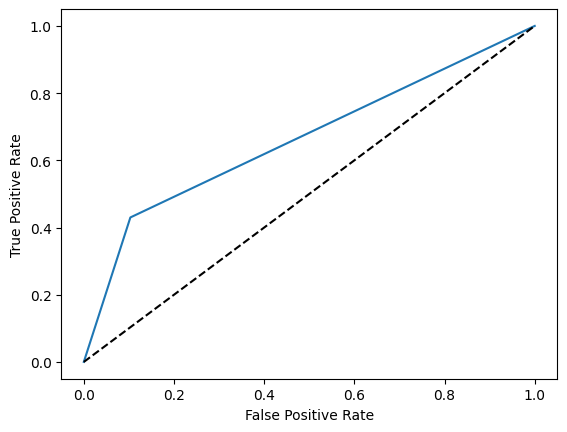

7097     0
29559    0
2405     0
7881     0
14036    0
        ..
2360     0
23924    0
18456    0
30022    0
36499    0
Name: y, Length: 848, dtype: int64
Feature: 0, Score: 0.05458
Feature: 1, Score: 0.04096
Feature: 2, Score: 0.12045
Feature: 3, Score: 0.05729
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03926
Feature: 6, Score: 0.11738
Feature: 7, Score: 0.07065
Feature: 8, Score: 0.07294
Feature: 9, Score: 0.05292
Feature: 10, Score: 0.05889
Feature: 11, Score: 0.10230
Feature: 12, Score: 0.04570
Feature: 13, Score: 0.10436
Feature: 14, Score: 0.06230
<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 7097 to 36499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          848 non-null    float64
 1   job          848 non-null    float64
 2   marital      848 non-null    float64
 3   education    848 non-null    float64
 4   balance      848 non-null    float64
 5   housing      848 non-null    f

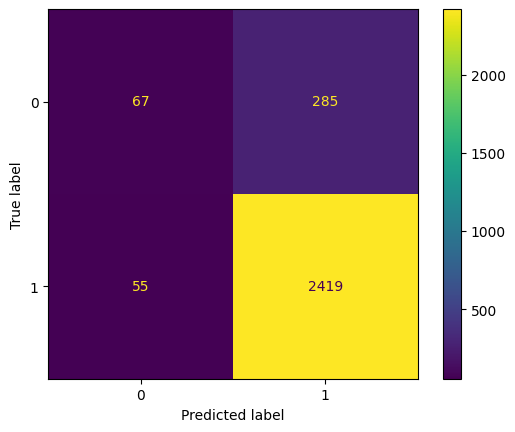


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2474
           1       0.55      0.19      0.28       352

    accuracy                           0.88      2826
   macro avg       0.72      0.58      0.61      2826
weighted avg       0.85      0.88      0.85      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.61


ROC Curve:



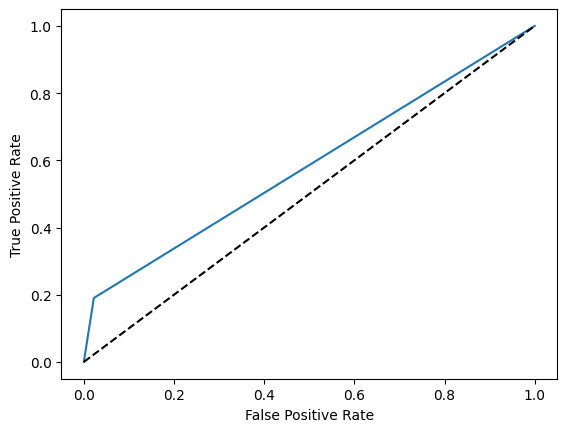

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.9
Training runtime: 329.12 seconds
Confusion Matrix:
[[ 328   24]
 [2060  414]]



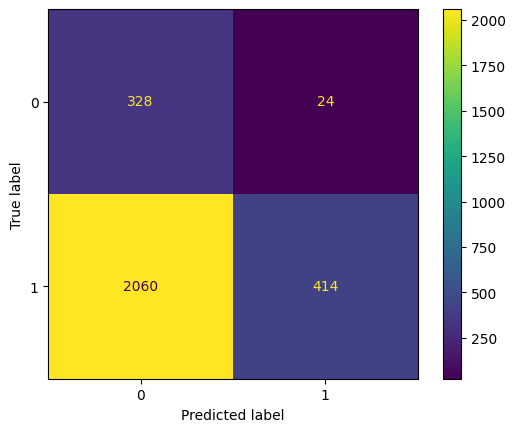


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.17      0.28      2474
           1       0.14      0.93      0.24       352

    accuracy                           0.26      2826
   macro avg       0.54      0.55      0.26      2826
weighted avg       0.84      0.26      0.28      2826


Accuracy: 0.26
Micro F1 score: 0.26
Macro F1 score: 0.26


ROC Curve:



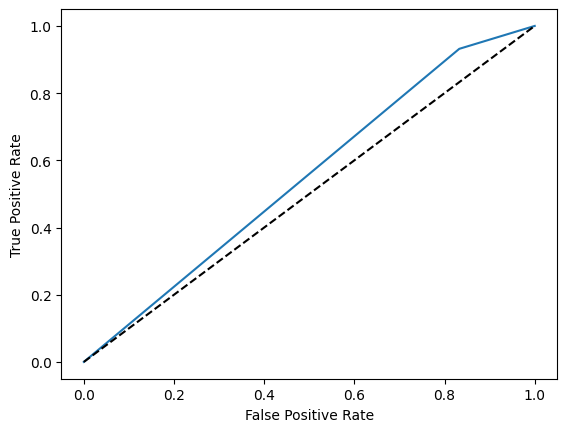

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.9
Training runtime: 768.09 seconds
Confusion Matrix:
[[  73  279]
 [ 139 2335]]



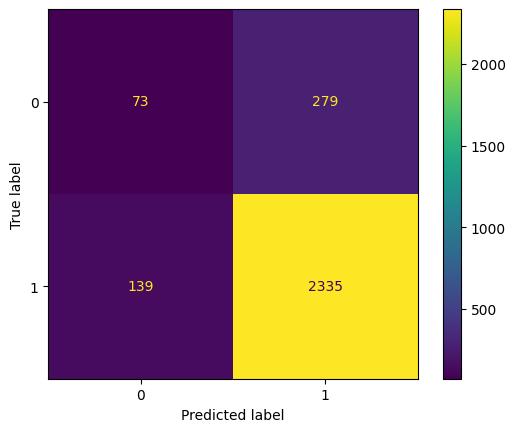


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2474
           1       0.34      0.21      0.26       352

    accuracy                           0.85      2826
   macro avg       0.62      0.58      0.59      2826
weighted avg       0.82      0.85      0.84      2826


Accuracy: 0.85
Micro F1 score: 0.85
Macro F1 score: 0.59


ROC Curve:



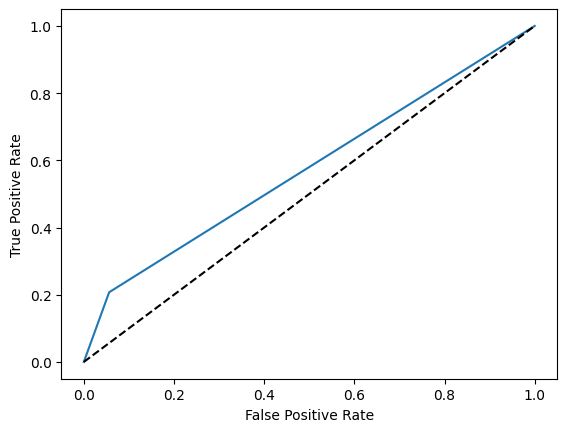

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 244.02 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Confusion Matrix:
[[ 116  236]
 [ 235 2239]]



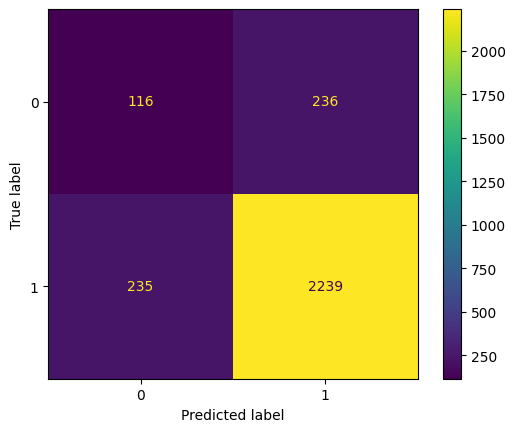


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2474
           1       0.33      0.33      0.33       352

    accuracy                           0.83      2826
   macro avg       0.62      0.62      0.62      2826
weighted avg       0.83      0.83      0.83      2826


Accuracy: 0.83
Micro F1 score: 0.83
Macro F1 score: 0.62


ROC Curve:



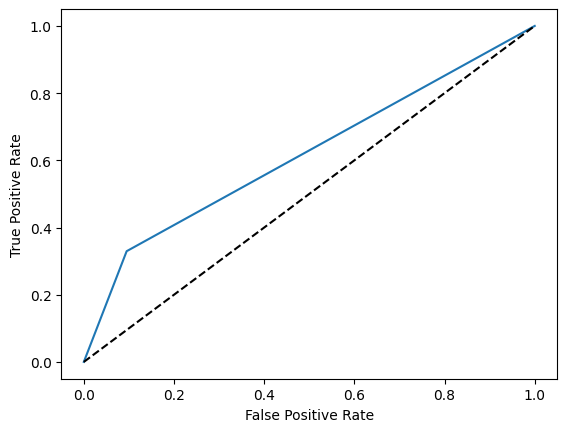

24062    1
11886    0
18172    0
44161    0
37962    0
        ..
17690    0
16370    0
20529    0
10006    0
29251    0
Name: y, Length: 424, dtype: int64
Feature: 0, Score: 0.06994
Feature: 1, Score: 0.04763
Feature: 2, Score: 0.06336
Feature: 3, Score: 0.03200
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.07205
Feature: 6, Score: 0.07384
Feature: 7, Score: 0.07290
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06158
Feature: 10, Score: 0.06606
Feature: 11, Score: 0.13022
Feature: 12, Score: 0.04226
Feature: 13, Score: 0.09451
Feature: 14, Score: 0.17363
<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 24062 to 29251
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          424 non-null    float64
 1   job          424 non-null    float64
 2   marital      424 non-null    float64
 3   education    424 non-null    float64
 4   balance      424 non-null    float64
 5   housing      424 non-null    

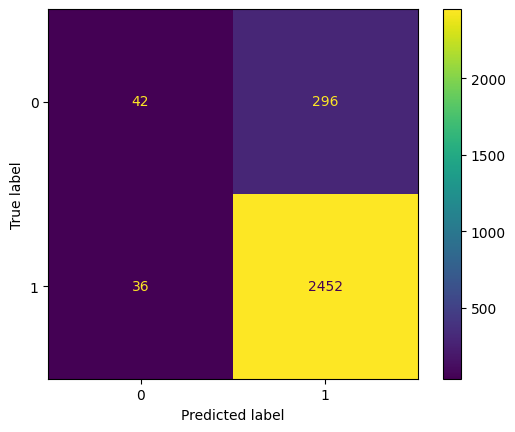


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2488
           1       0.54      0.12      0.20       338

    accuracy                           0.88      2826
   macro avg       0.72      0.55      0.57      2826
weighted avg       0.85      0.88      0.85      2826


Accuracy: 0.88
Micro F1 score: 0.88
Macro F1 score: 0.57


ROC Curve:



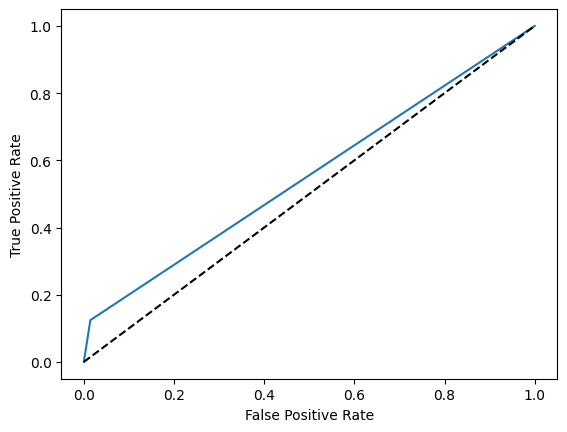

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.95
Training runtime: 212.00 seconds
Confusion Matrix:
[[ 333    5]
 [2326  162]]



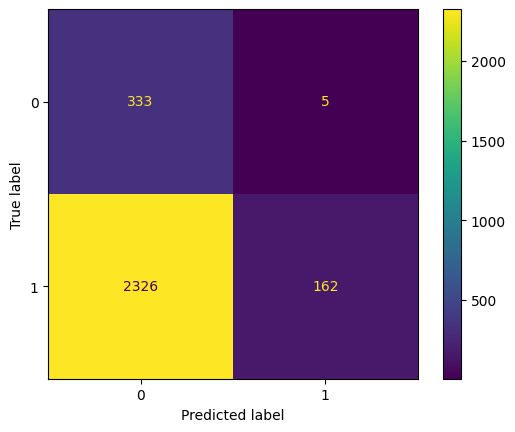


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.07      0.12      2488
           1       0.13      0.99      0.22       338

    accuracy                           0.18      2826
   macro avg       0.55      0.53      0.17      2826
weighted avg       0.87      0.18      0.13      2826


Accuracy: 0.18
Micro F1 score: 0.18
Macro F1 score: 0.17


ROC Curve:



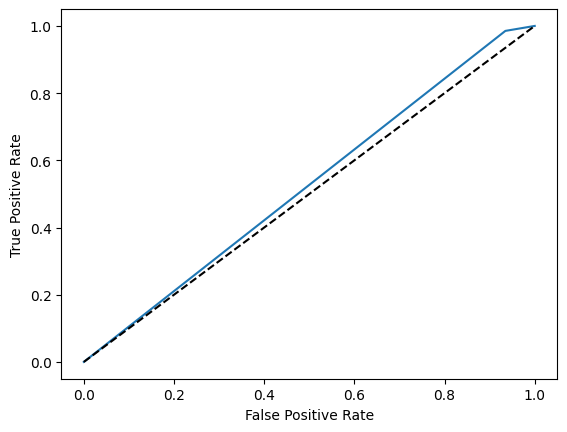

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.95
Training runtime: 312.17 seconds
Confusion Matrix:
[[  39  299]
 [  79 2409]]



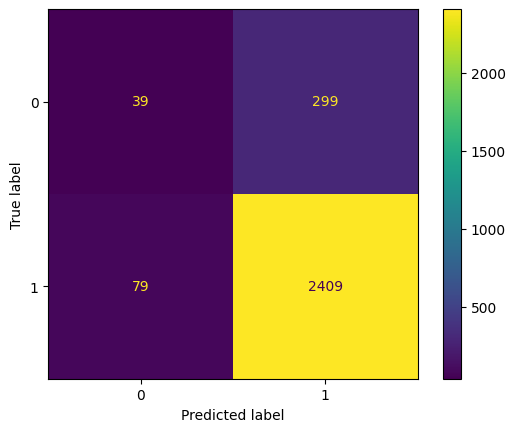


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2488
           1       0.33      0.12      0.17       338

    accuracy                           0.87      2826
   macro avg       0.61      0.54      0.55      2826
weighted avg       0.82      0.87      0.84      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.55


ROC Curve:



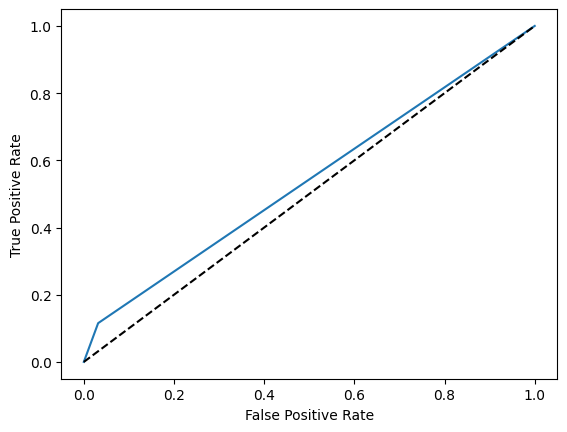

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 224.76 seconds
Confusion Matrix:
[[ 106  232]
 [ 267 2221]]



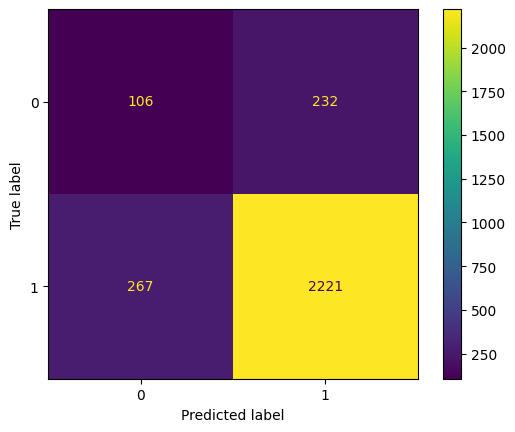


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2488
           1       0.28      0.31      0.30       338

    accuracy                           0.82      2826
   macro avg       0.59      0.60      0.60      2826
weighted avg       0.83      0.82      0.83      2826


Accuracy: 0.82
Micro F1 score: 0.82
Macro F1 score: 0.60


ROC Curve:



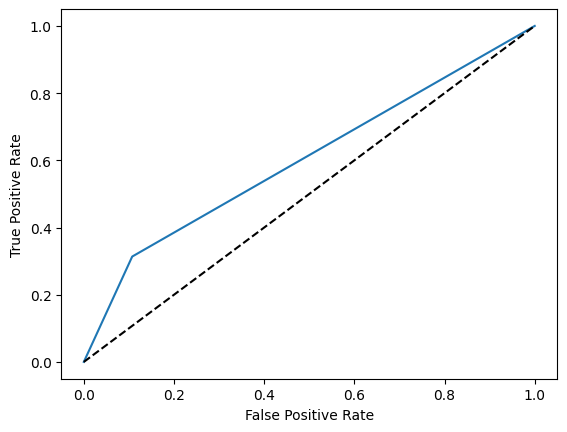

40779    1
37801    0
38757    0
18796    0
29852    0
        ..
25185    0
43934    1
188      0
33431    1
10473    0
Name: y, Length: 85, dtype: int64
Feature: 0, Score: 0.07127
Feature: 1, Score: 0.14760
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03048
Feature: 6, Score: 0.14752
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.03379
Feature: 10, Score: 0.05095
Feature: 11, Score: 0.13929
Feature: 12, Score: 0.07408
Feature: 13, Score: 0.09979
Feature: 14, Score: 0.20525
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 40779 to 10473
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          85 non-null     float64
 1   job          85 non-null     float64
 2   balance      85 non-null     float64
 3   housing      85 non-null     float64
 4   day_of_week  85 non-null     float64
 5   month        85 non-null     fl

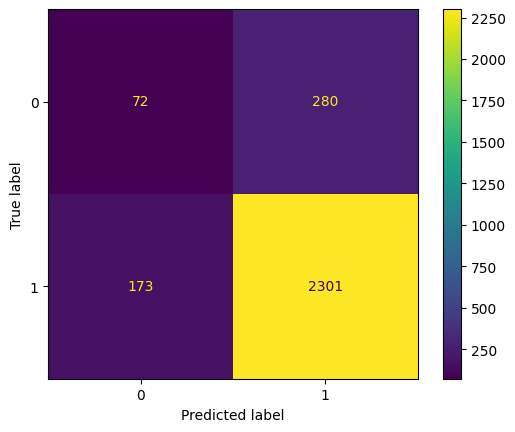


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2474
           1       0.29      0.20      0.24       352

    accuracy                           0.84      2826
   macro avg       0.59      0.57      0.58      2826
weighted avg       0.82      0.84      0.83      2826


Accuracy: 0.84
Micro F1 score: 0.84
Macro F1 score: 0.58


ROC Curve:



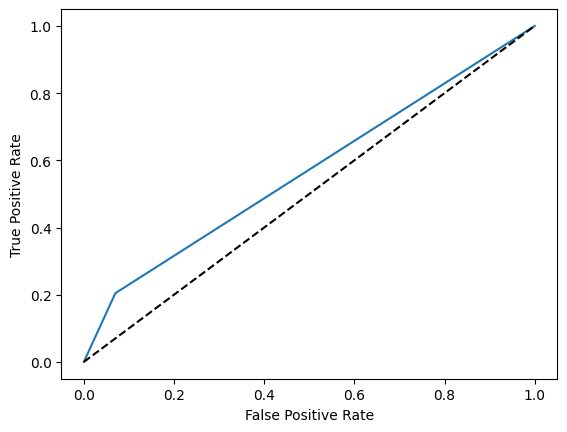

Semi-Supervised Learning Co-Training Algorithm - Level of Unlabelled Data: 0.99
Training runtime: 128.56 seconds
Confusion Matrix:
[[ 346    6]
 [2390   84]]



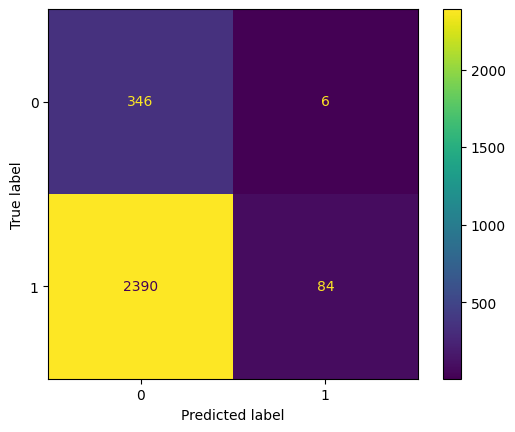


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.03      0.07      2474
           1       0.13      0.98      0.22       352

    accuracy                           0.15      2826
   macro avg       0.53      0.51      0.14      2826
weighted avg       0.83      0.15      0.09      2826


Accuracy: 0.15
Micro F1 score: 0.15
Macro F1 score: 0.14


ROC Curve:



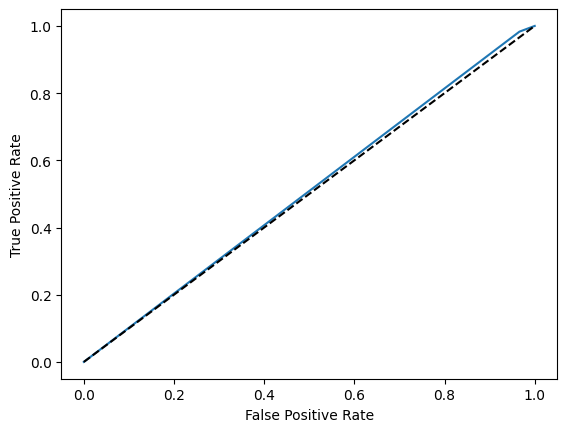

Semi-Supervised Learning Ensemble Algorithm (SemiBoost) - Level of Unlabelled Data: 0.99
Training runtime: 244.84 seconds
Confusion Matrix:
[[  22  330]
 [  50 2424]]



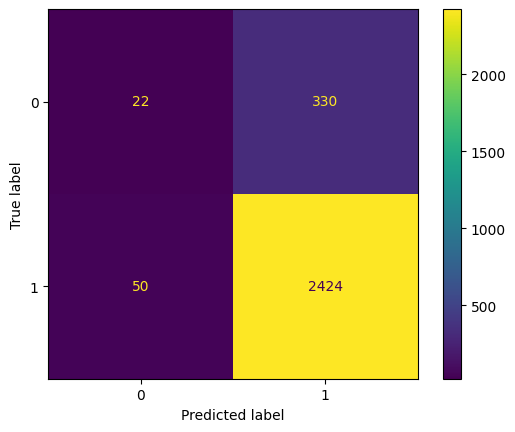


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2474
           1       0.31      0.06      0.10       352

    accuracy                           0.87      2826
   macro avg       0.59      0.52      0.52      2826
weighted avg       0.81      0.87      0.82      2826


Accuracy: 0.87
Micro F1 score: 0.87
Macro F1 score: 0.52


ROC Curve:



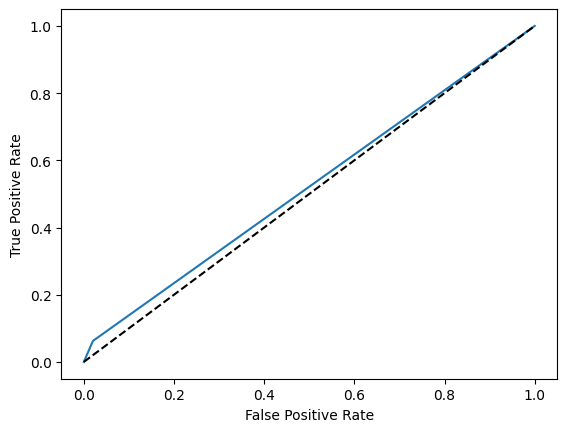

Intrinsically Semi-Supervised Learning Algorithm (Label Propagation) - Level of Unlabelled Data: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Training runtime: 195.44 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Confusion Matrix:
[[ 128  224]
 [ 444 2030]]



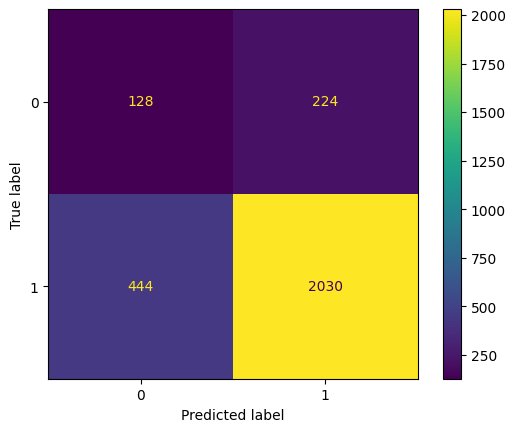


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2474
           1       0.22      0.36      0.28       352

    accuracy                           0.76      2826
   macro avg       0.56      0.59      0.57      2826
weighted avg       0.82      0.76      0.79      2826


Accuracy: 0.76
Micro F1 score: 0.76
Macro F1 score: 0.57


ROC Curve:



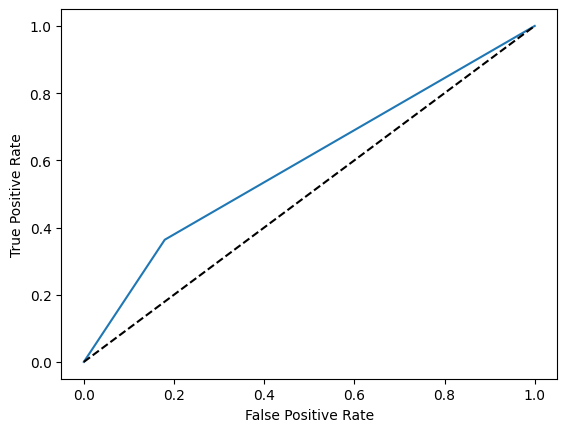

In [45]:
evaluation_reports = evaluate_semi_supervised_learning_algorithms(0.25, XGBClassifier(**best_xgb_hyperparams), SVC(**best_svm_hyperparams), True)

In [46]:
apply_friedman_test(evaluation_reports)

Performance Comparison of Semi-Supervised Learning Algorithms
Friedman Test:
statistic: 4.92 P-value: 0.18
There are no statistical differences between the performances of the algorithms.
